# <a id='toc1_'></a>[Data Explorations](#toc0_)

Here we are looking at taking our sample of the amazon reviews dataset and exploring it. We divide the section into two parts. 

1. A quick overview of the data - shape, size, features etc.
2. A more detailed look at the data - distributions, correlations etc.


We have our dataset `amz_rev_cleaned.csv` which shall be loaded and used.

**Table of contents**<a id='toc0_'></a>    
- [Data Loading and Setup](#toc2_)    
- [Summary of the Data](#toc3_)    
- [Missing Data Visualised](#toc4_)    
- [Distribution Plots](#toc5_)    
  - [Ratings](#toc5_1_)    
  - [Categories](#toc5_2_)    
- [Reviewers](#toc6_)    
    - [Top 10 Reviewers by Number of Reviews](#toc6_1_1_)    
    - [Distribution of Number of Reviews](#toc6_1_2_)    
    - [Average Rating against Number of Reviews per Reviewer](#toc6_1_3_)    
    - [Top 10 Reviewers by Average Length of Reviews](#toc6_1_4_)    
    - [Top 10 Reviewers by Average Rating (with at least 50 reviews)](#toc6_1_5_)    
- [Products](#toc7_)    
    - [Top 10 Products by Number of Reviews](#toc7_1_1_)    
    - [Top 10 Products by Average Rating](#toc7_1_2_)    
    - [Product Average Rating vs Number of Reviews](#toc7_1_3_)    
    - [Number of Reviews per Product over Time](#toc7_1_4_)    
    - [Average Rating per Product over Time](#toc7_1_5_)    
- [Categories](#toc8_)    
    - [Categories by Average Rating](#toc8_1_1_)    
    - [Average Rating of Categories over Time](#toc8_1_2_)    
    - [Average Rating per Category over Time](#toc8_1_3_)    
- [Reviews and Review Text](#toc9_)    
    - [Review Length vs Rating](#toc9_1_1_)    
    - [Top 10 Reviews by Length](#toc9_1_2_)    
    - [Number of Reviews over Time](#toc9_1_3_)    
- [Brands](#toc10_)    
    - [Top 10 Brands by Number of Reviews](#toc10_1_1_)    
    - [Top 10 Brands by Average Rating](#toc10_1_2_)    
    - [Brand Average Rating vs Number of Reviews](#toc10_1_3_)    
    - [Average Rating of Brands over Time for Top 10 Brands](#toc10_1_4_)    
    - [Average Rating per Product over Time](#toc10_1_5_)    
- [Sentiment Analysis](#toc11_)    
  - [Sentiment per Review](#toc11_1_)    
    - [Most Positive Reviews](#toc11_1_1_)    
    - [Most Negative Reviews](#toc11_1_2_)    
    - [Most Positive Reviewers](#toc11_1_3_)    
    - [Most Negative Reviewers](#toc11_1_4_)    
    - [NRC Emotion Lexicon Analysis](#toc11_1_5_)    
  - [VADER Lexicon Analysis](#toc11_2_)    
    - [Reviews](#toc11_2_1_)    
    - [Products](#toc11_2_2_)    
    - [ Categories](#toc11_2_3_)    
    - [Brands](#toc11_2_4_)    
  - [Distribution of Sentiment Scores](#toc11_3_)    
  - [Sentiment per Product](#toc11_4_)    
    - [Most Positive Products](#toc11_4_1_)    
    - [Most Negative Products](#toc11_4_2_)    
  - [Sentiment per Category](#toc11_5_)    
    - [Most Positive Categories](#toc11_5_1_)    
    - [Most Negative Categories](#toc11_5_2_)    
  - [Sentiment per Brand](#toc11_6_)    
    - [Most Positive Brands](#toc11_6_1_)    
    - [Most Negative Brands](#toc11_6_2_)    
  - [Comparing Lexicons](#toc11_7_)    
- [Data Summaries](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Loading and Setup](#toc0_)

In [3]:
# reset workspace
%reset -f

# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pavansingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# load full data
#data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti_1.csv')

# load sample data
data = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/Masters-Dissertation/Code/Data/amz_with_senti_sample_1.csv')

# <a id='toc3_'></a>[Summary of the Data](#toc0_)

In [5]:
# view the data 
display(data.head(4))

# shape of data
print("Shape of Data:", data.shape, '\n')

# columns in data
print("Columns in Data:", data.columns, '\n')

,reviewerID,reviewerName,reviewTime,asin,reviewText,category,overall,normalized_rating,stemmed_words_revText,lemmatized_words_revText,filtered_tokens_revText,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_revText,sentiment_score_bing_revText,sentiment_score_nrc_revText
0,A29NAG6NZOBAJ8,kingpin16,2014-11-24,B001IH8ERA,tuna yum,grocery_and_gourmet_food,5.0,1.00,"['tuna', 'yum']","['tuna', 'yum']","['tuna', 'yum']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000,0,0,trust
1,A1WVA7V02PQOY6,Dad of Divas,2015-02-10,B000ZGY4PG,as someone that has always liked eating oatmea...,grocery_and_gourmet_food,5.0,1.00,"['someon', 'alway', 'like', 'eat', 'oatmeal', ...","['someone', 'always', 'liked', 'eating', 'oatm...","['someone', 'always', 'liked', 'eating', 'oatm...","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.397564,0.705641,4,4,positive
2,A1KQJLBDF2OEMD,Sherelle Ellis,2015-07-28,B00YLLHNHW,humans are stupid they love and they make mist...,kindle_store,4.0,0.75,"['human', 'stupid', 'love', 'make', 'mistak', ...","['human', 'stupid', 'love', 'make', 'mistake',...","['humans', 'stupid', 'love', 'make', 'mistakes...","{'neg': 0.109, 'neu': 0.703, 'pos': 0.188, 'co...",0.097186,0.688095,4,1,sadness
3,A1MUHTKSOY7WVO,Upgrade Taos Computers,2015-05-20,B00GJU4DD0,this thing rocks very lightslim great fit does...,electronics,5.0,1.00,"['thing', 'rock', 'lightslim', 'great', 'fit',...","['thing', 'rock', 'lightslim', 'great', 'fit',...","['thing', 'rocks', 'lightslim', 'great', 'fit'...","{'neg': 0.0, 'neu': 0.512, 'pos': 0.488, 'comp...",0.466667,0.483333,3,1,trust


Shape of Data: (403550, 17) 

Columns in Data: Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'reviewText',
       'category', 'overall', 'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText'],
      dtype='object') 



In [6]:
# summary of data
print("Number of reviews:", data.shape[0])
print("Number of Customers:", data.reviewerID.unique().size)
print("Number of unique products:", data.asin.nunique())
print("Number of unique reviewers:", data.reviewerID.nunique())
print("Number of unique categories:", data.category.nunique())

# numerical summary of data
print("\n",data.describe())

Number of reviews: 403550
Number of Customers: 161210
Number of unique products: 227151
Number of unique reviewers: 161210
Number of unique categories: 28

              overall  normalized_rating  sentiments_textblob_revText  \
count  403550.000000      403550.000000                403550.000000   
mean        4.416043           0.854011                     0.303727   
std         1.027104           0.256776                     0.289167   
min         1.000000           0.000000                    -1.000000   
25%         4.000000           0.750000                     0.100000   
50%         5.000000           1.000000                     0.255560   
75%         5.000000           1.000000                     0.500000   
max         5.000000           1.000000                     1.000000   

       subjectivities_textblob_revText  sentiment_score_afinn_revText  \
count                    403550.000000                  403550.000000   
mean                          0.545557          

# <a id='toc4_'></a>[Missing Data Visualised](#toc0_)


 There are missing values in the data.


,reviewerID,reviewerName,reviewTime,asin,reviewText,category,overall,normalized_rating,stemmed_words_revText,lemmatized_words_revText,filtered_tokens_revText,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_revText,sentiment_score_bing_revText,sentiment_score_nrc_revText
2185,A1MSA79F5J0KXW,kilamazara,2016-10-24,B003F19OFS,NaN,digital_music,5.0,1.0,[],[],[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0,0,trust
2327,A3RJER4SDTSOII,Amazon Customer,2016-04-07,B004B3BCC2,NaN,digital_music,5.0,1.0,[],[],[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0,0,trust
2376,A1NM35QMO826SY,joyce maley,2014-07-27,B000WWMC3O,NaN,arts_crafts,5.0,1.0,[],[],[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0,0,trust
9361,A4KDRKRTRMH51,Danniel,2018-03-06,B001KQFZWQ,NaN,digital_music,5.0,1.0,[],[],[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0,0,trust
11008,A3FIZCYKP5Z82G,Heather West,2017-02-15,B00JYR54JM,NaN,toys_and_games,5.0,1.0,[],[],[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0,0,trust



 Columns with Missing Data:
 reviewerID                           0
reviewerName                         0
reviewTime                           0
asin                                 0
reviewText                         171
category                             0
overall                              0
normalized_rating                    0
stemmed_words_revText                0
lemmatized_words_revText             0
filtered_tokens_revText              0
sentiments_vader_revText             0
sentiments_textblob_revText          0
subjectivities_textblob_revText      0
sentiment_score_afinn_revText        0
sentiment_score_bing_revText         0
sentiment_score_nrc_revText          0
dtype: int64


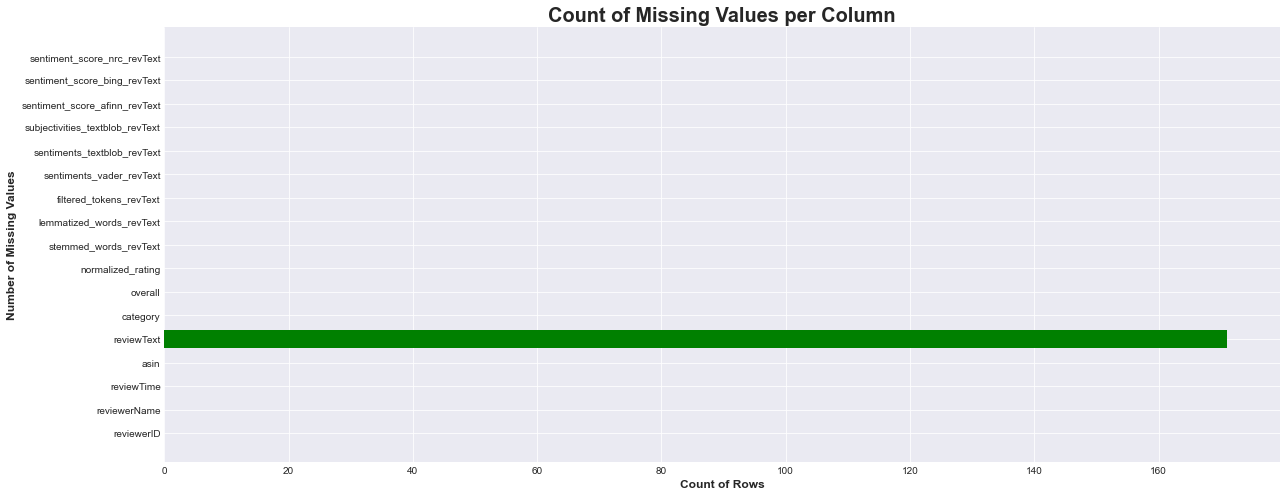

In [7]:
# Missing values
is_na = data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(data[data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", data.isna().sum())
    missing_values_count = data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Count of Rows", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

In [8]:
# remove rows with empty reviewText
data = data[data['reviewText'].notnull()]

In [9]:
# only keep columns that are needed 
data = data[['reviewerID', 'reviewerName', 'reviewTime', 'asin','reviewText', 'category', 'overall',
       'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText','sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText','sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiment_score_nrc_revText']]
data.head(2)

,reviewerID,reviewerName,reviewTime,asin,reviewText,category,overall,normalized_rating,stemmed_words_revText,lemmatized_words_revText,filtered_tokens_revText,sentiments_vader_revText,sentiments_textblob_revText,subjectivities_textblob_revText,sentiment_score_afinn_revText,sentiment_score_bing_revText,sentiment_score_nrc_revText
0,A29NAG6NZOBAJ8,kingpin16,2014-11-24,B001IH8ERA,tuna yum,grocery_and_gourmet_food,5.0,1.0,"['tuna', 'yum']","['tuna', 'yum']","['tuna', 'yum']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000,0,0,trust
1,A1WVA7V02PQOY6,Dad of Divas,2015-02-10,B000ZGY4PG,as someone that has always liked eating oatmea...,grocery_and_gourmet_food,5.0,1.0,"['someon', 'alway', 'like', 'eat', 'oatmeal', ...","['someone', 'always', 'liked', 'eating', 'oatm...","['someone', 'always', 'liked', 'eating', 'oatm...","{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.397564,0.705641,4,4,positive


***
# <a id='toc5_'></a>[Distribution Plots](#toc0_)

In [10]:
data.columns

Index(['reviewerID', 'reviewerName', 'reviewTime', 'asin', 'reviewText',
       'category', 'overall', 'normalized_rating', 'stemmed_words_revText',
       'lemmatized_words_revText', 'filtered_tokens_revText',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'subjectivities_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText'],
      dtype='object')

## <a id='toc5_1_'></a>[Ratings](#toc0_)

Proportion of Review Ratings:
 5.0    0.674485
4.0    0.176635
3.0    0.076992
1.0    0.037816
2.0    0.034072
Name: overall, dtype: float64


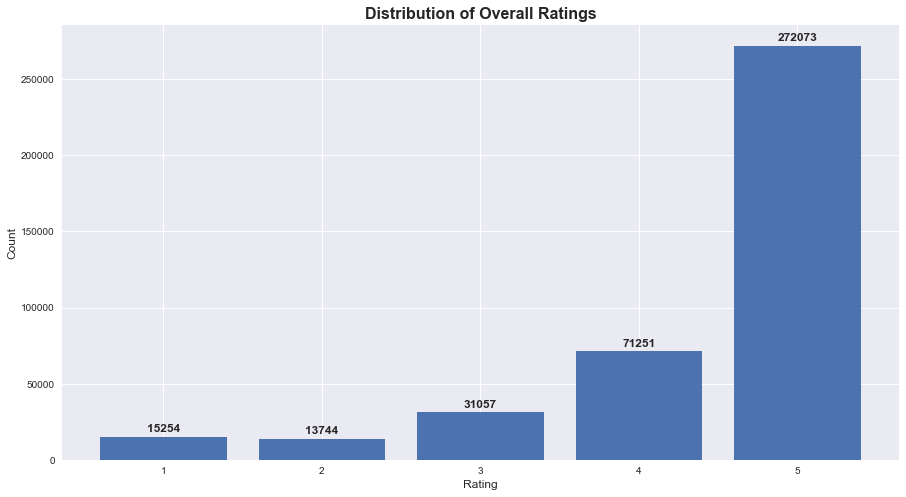

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to "seaborn"
plt.style.use('seaborn')

# Distribution of ratings
print("Proportion of Review Ratings:\n", data['overall'].value_counts(normalize=True))

# Make 'overall' into categorical variable
ratings = data['overall'].astype('category')

# Calculate the count for each rating category
rating_counts = ratings.value_counts().sort_index()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(rating_counts.index, rating_counts.values, color='#4c72b0')

# Annotate the height of each bar
for rect in bars:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)

# Add title and axis labels
ax.set_title("Distribution of Overall Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

plt.show()


## <a id='toc5_2_'></a>[Categories](#toc0_)

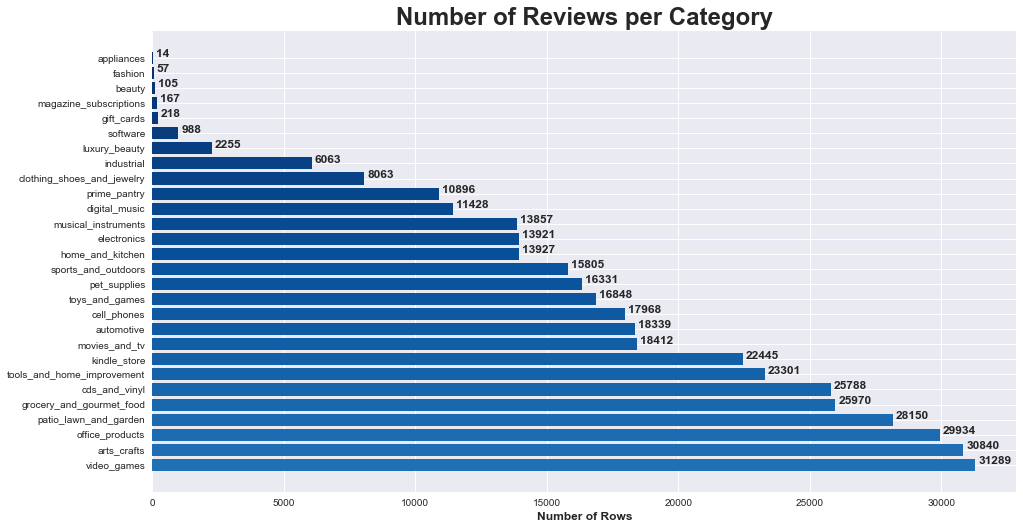

In [14]:
# biggest companies (most movies) - over 100 movies
value_counts_cat = data.category.value_counts()
colors = cm.Blues(np.linspace(0.75, 1, len(value_counts_cat)))

# Production Companies with most movies - bar
fig = plt.figure(figsize=(15, 8)) # create figure
bar = plt.barh(y=value_counts_cat.index, width=value_counts_cat.values, color=colors)
plt.title("Number of Reviews per Category", fontsize=24, fontweight='bold')
plt.xlabel("Number of Rows", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 10), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plt.show()


***
# <a id='toc6_'></a>[Reviewers](#toc0_)

In this section we look at:

- Top 10 Reviewers by Number of Reviews
- Average Rating against Number of Reviews per Reviewer
- Top 10 Reviewers by Length of Reviews
- Top 10 Reviewers by Average Rating (with at least 10 reviews)
- Top 10 Reviewers by Review Count



### <a id='toc6_1_1_'></a>[Top 10 Reviewers by Number of Reviews](#toc0_)

In [15]:
# How many customers
print("Number of Customers:", data.reviewerID.unique().size)

# Count Reviews and Average Rating per Customer
cust_data = data.groupby(['reviewerID']).agg({"overall": ["count", "mean"]})
cust_data.columns = ['count_rev', 'mean_rat']
cust_data['mean_rat'] = np.round(cust_data.mean_rat,3)
display(cust_data.sort_values(by='count_rev', ascending=False).head(5))

Number of Customers: 161159


,count_rev,mean_rat
reviewerID,,
A3W4D8XOGLWUN5,175,3.509
A9Q28YTLYREO7,136,3.816
AWG2O9C42XW5G,108,4.759
A2582KMXLK2P06,105,4.000
AJKWF4W7QD4NS,103,3.748


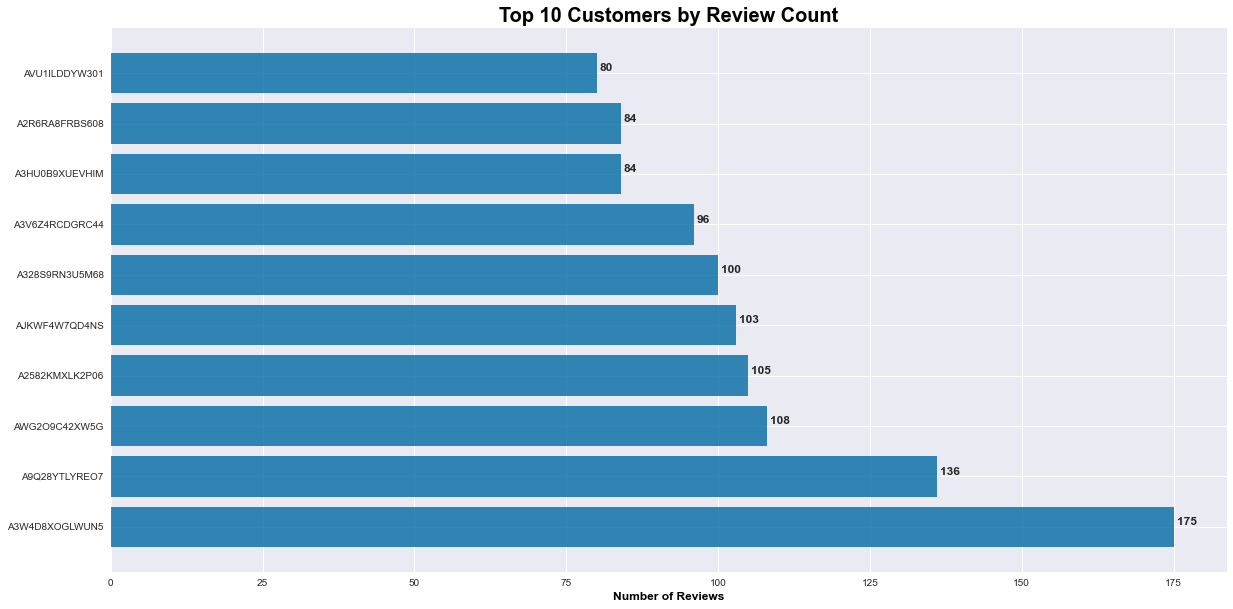

In [16]:
plt.style.use('tableau-colorblind10')

sample_top = cust_data.sort_values(['count_rev'], ascending=False).head(10)

# Top 10 customers by review count - bar plot
fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, alpha=0.8)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

plt.show()


### <a id='toc6_1_2_'></a>[Distribution of Number of Reviews](#toc0_)

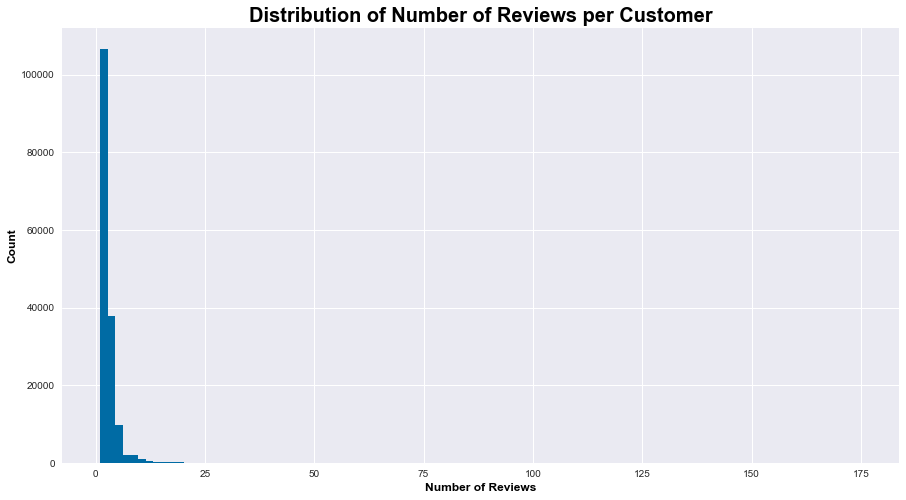

In [17]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data['count_rev'], bins=100)
plt.title("Distribution of Number of Reviews per Customer", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

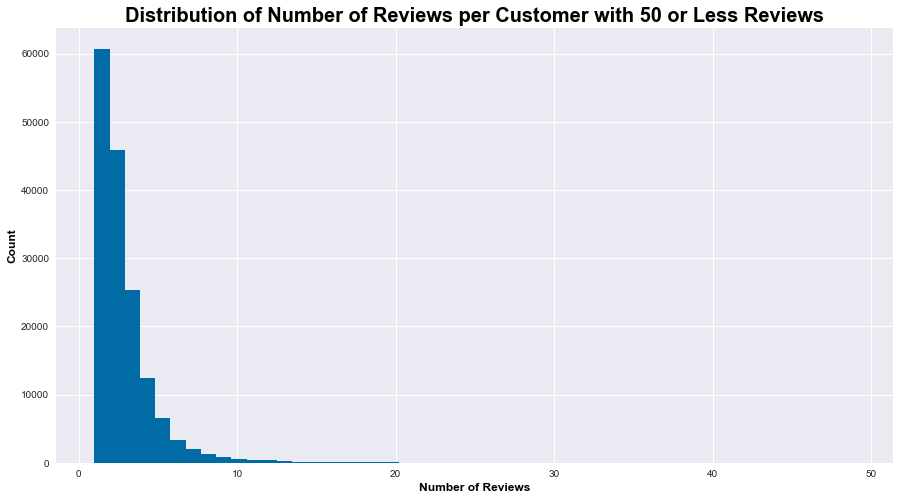

In [18]:
# distribution of number of reviews per customer
fig = plt.figure(figsize=(15, 8))
plt.style.use('tableau-colorblind10')
plt.hist(cust_data[cust_data['count_rev']<50]['count_rev'], bins=50)
plt.title("Distribution of Number of Reviews per Customer with 50 or Less Reviews", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("Count", fontsize=12, fontweight='semibold', color='black')
plt.show()

In [19]:
# count of reviewers with more than 5 reviews
print("Number of Customers with more than 5 Reviews:", cust_data[cust_data['count_rev']>5].shape[0])

Number of Customers with more than 5 Reviews: 10094


### <a id='toc6_1_3_'></a>[Average Rating against Number of Reviews per Reviewer](#toc0_)

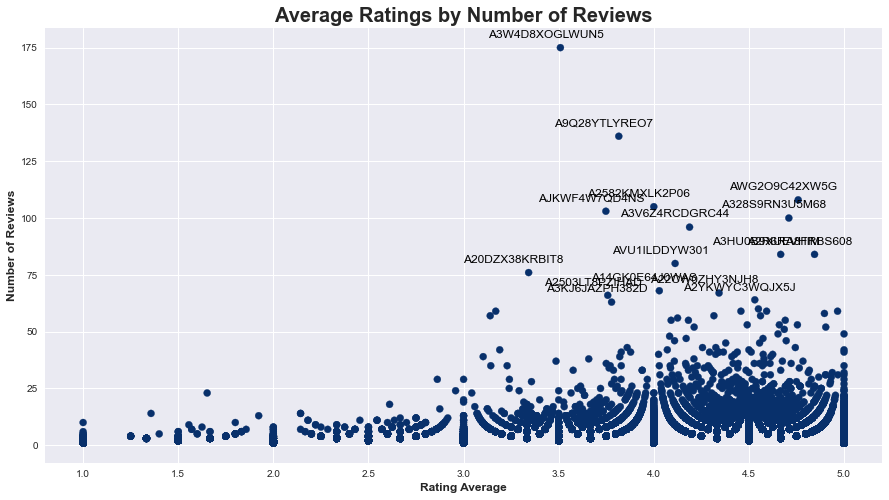

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
plt.scatter(cust_data.mean_rat, cust_data.count_rev, c=cust_data.mean_rat, cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data.index):
    if cust_data.count_rev[i] > 60:
        plt.annotate(id, (cust_data.loc[cust_data.index == id, "mean_rat"], cust_data.loc[cust_data.index == id, "count_rev"]), textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=12, color='black')
    else:
        continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()


### <a id='toc6_1_4_'></a>[Top 10 Reviewers by Average Length of Reviews](#toc0_)

In [21]:
# Function to count sentences in a given text
def count_sentences(text):
    if isinstance(text, str):
        sentences = nltk.sent_tokenize(text)
        return len(sentences)
    else:
        return 0

# Function to count words in a given text
def count_words(text):
    if isinstance(text, str):
        words = text.split()
        return len(words)
    else:
        return 0

# Function to count characters in a given text
def count_characters(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0

# Apply the function to the 'reviewText' column
data['review_sentence_count'] = data['reviewText'].apply(count_sentences)

# Apply the function to the 'reviewText' column
data['review_word_count'] = data['reviewText'].apply(count_words)

# Apply the function to the 'reviewText' column
data['review_character_count'] = data['reviewText'].apply(count_characters)


In [22]:
top_10_rev_len = data.groupby(['reviewerID']).agg({"review_word_count": "mean"})
top_10_rev_len.sort_values(by='review_word_count', ascending=False).head(10)

,review_word_count
reviewerID,
A2Z9FXHC1L66EW,3432.000000
A1ZSOK69XSXF73,3207.000000
A8RGWWCC1PVMQ,3002.500000
ACTUPMCDDJEBN,2773.000000
A1JLJOU8I57H13,2651.500000
A3HORVSI2I23YR,2602.000000
A2MUSVT9R2F9WR,2540.000000
AXOZ5BWOEDL76,2407.555556
AGYH54PM5SJP3,2383.000000


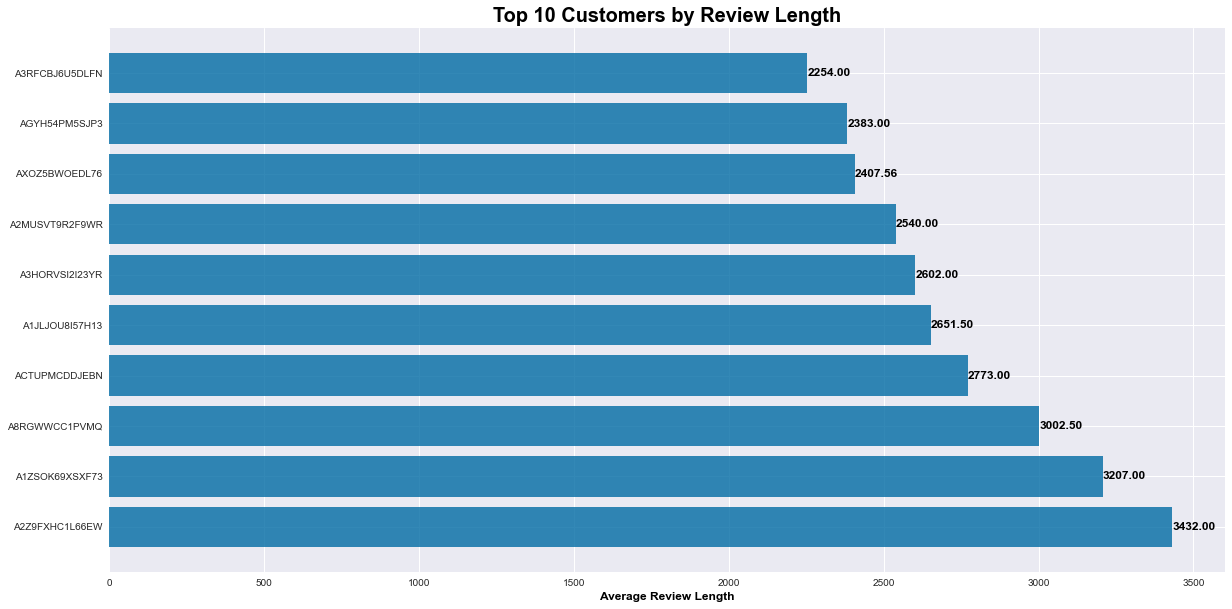

In [23]:
# Top 10 customers by review length - bar plot
fig = plt.figure(figsize=(20, 10))
bar = plt.barh(y=top_10_rev_len.sort_values(['review_word_count'], ascending=False).head(10).index,
               width=top_10_rev_len.sort_values(['review_word_count'], ascending=False).head(10).review_word_count,
               alpha=0.8)

# Add average review length as text
for rect in bar:
    width = rect.get_width()
    y = rect.get_y() + rect.get_height() / 2
    plt.text(width, y, f'{width:.2f}', ha='left', va='center', color='black', fontweight='semibold', fontsize=12)

plt.title("Top 10 Customers by Review Length", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Average Review Length", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
plt.show()

### <a id='toc6_1_5_'></a>[Top 10 Reviewers by Average Rating (with at least 50 reviews)](#toc0_)

,count_rev,mean_rat
reviewerID,,
A2NYK9KWFMJV4Y,59,4.966
A2H3JURQZOHVMB,52,4.904
A16CZRQL23NOIW,58,4.897
A2R6RA8FRBS608,84,4.845
AWG2O9C42XW5G,108,4.759
A1X1CEGHTHMBL1,53,4.755
A328S9RN3U5M68,100,4.710
ALYZJ7W14YS26,55,4.691
A2QDOJFFLFGF18,51,4.686


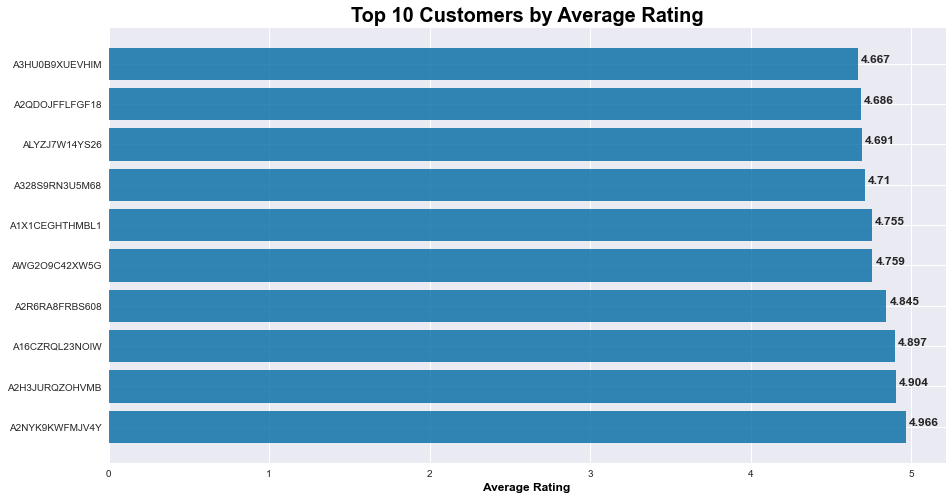

In [24]:
# top 10 customers by average rating
display(cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10))

# bar plot of top 10 customers by average rating
fig = plt.figure(figsize=(15,8))
bar = plt.barh(y=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).index, width=cust_data[cust_data.count_rev > 50].sort_values(by='mean_rat', ascending=False).head(10).mean_rat, alpha=0.8)
plt.title("Top 10 Customers by Average Rating", fontsize=20, fontweight='bold', color='black')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold', color='black')
plt.ylabel("", fontsize=12, fontweight='semibold', color='black')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 20), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
plt.show()

***
# <a id='toc7_'></a>[Products](#toc0_)


### <a id='toc7_1_1_'></a>[Top 10 Products by Number of Reviews](#toc0_)

In [25]:
# How many items/products?
print("Number of Products:", data.asin.unique().size)

# Number reviews and average ratings per product
prod_data = data.groupby(['asin']).agg({"overall": ["count", "mean"]})
prod_data.columns = ['count_rev', 'mean_rat']
prod_data['mean_rat'] = np.round(prod_data.mean_rat,3)
display(prod_data.sort_values(by='count_rev', ascending=False).head(10))

Number of Products: 227087


,count_rev,mean_rat
asin,,
B0002H03YY,114,4.632
B00BUKL666,110,4.573
B0001DUD9O,110,4.636
B0002H05BA,106,4.736
B0002E3CK4,105,4.771
B00006IEEV,102,4.676
B00172XBQA,99,4.667
B00281K7UW,98,4.827
B0006LOBA8,92,4.598


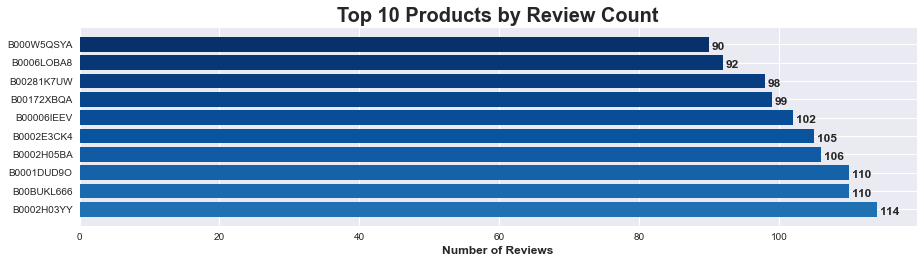

In [26]:
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = prod_data.sort_values(['count_rev'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Products by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


### <a id='toc7_1_2_'></a>[Top 10 Products by Average Rating](#toc0_)

Look at products with more than 100 Reviews

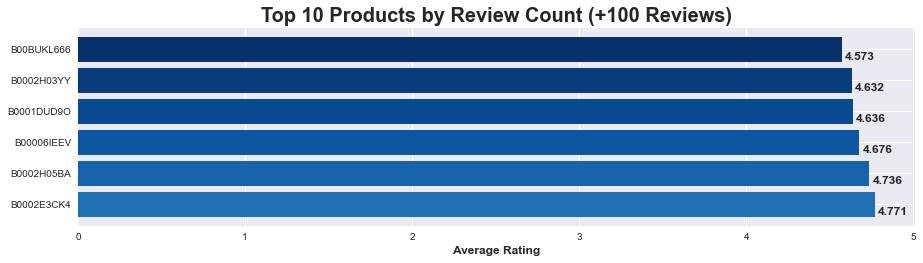

In [28]:
# Plot of Highest Average Ratings
plt.style.use('seaborn-darkgrid')
sample_top = prod_data[prod_data.count_rev > 100].sort_values(['mean_rat'], ascending=False).head(10)
colors = cm.Blues(np.linspace(0.75, 1, len(sample_top)))

fig = plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.mean_rat, color=colors)
plt.title("Top 10 Products by Review Count (+100 Reviews)", fontsize=20, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 5), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)


### <a id='toc7_1_3_'></a>[Product Average Rating vs Number of Reviews](#toc0_)

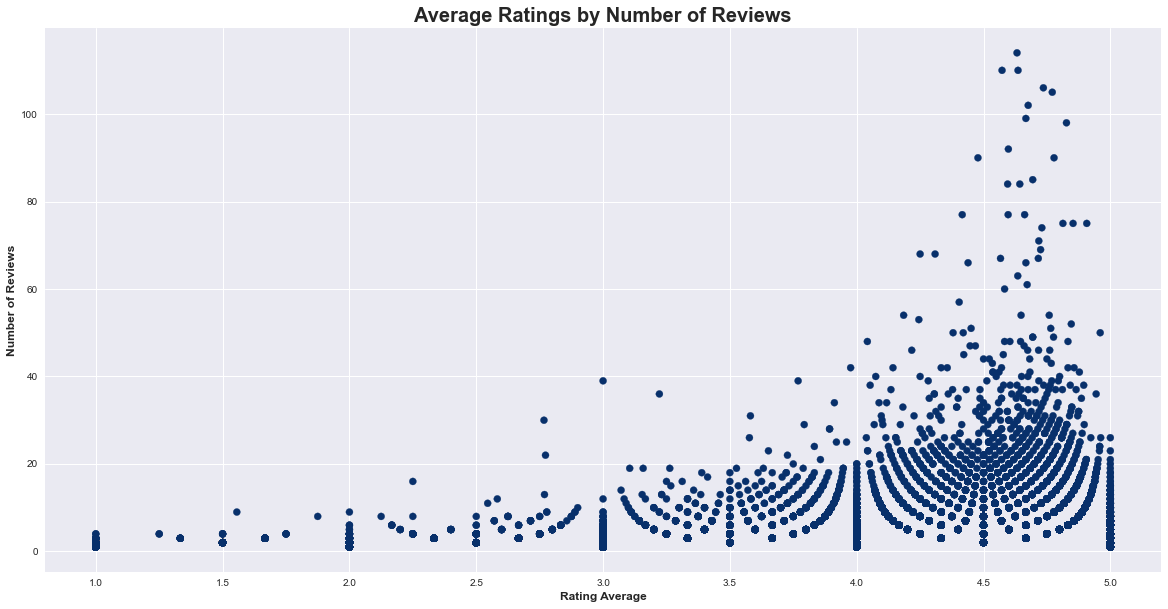

In [30]:
# Plot of Average Rating vs Count Reviews
fig = plt.figure(figsize=(20, 10))

plt.scatter(prod_data.mean_rat, prod_data.count_rev, c=prod_data.mean_rat,  cmap='Blues', s=50, vmin=0.2, vmax=1.0)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(prod_data.index):
    if (prod_data.count_rev[i] >= 400):
        if id == 'B0001FS9NE':
            xytext = (15, -15)
        else: xytext=(-15,10)
        plt.annotate(id, (prod_data.loc[prod_data.index==id, "mean_rat"], prod_data.loc[prod_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

plt.show()

### <a id='toc7_1_4_'></a>[Number of Reviews per Product over Time](#toc0_)

For products with over 100 reviews

In [31]:
asin = prod_data[prod_data.count_rev > 100].sort_values(by='mean_rat', ascending=False).index
print("Number of Products with more than 100 reviews:", len(asin))

# plot reviews per product in asin over time
print("First Review:", data.reviewTime.min(), "\nLast Review:", data.reviewTime.max())


Number of Products with more than 100 reviews: 6
First Review: 1998-05-25 
Last Review: 2018-10-04


In [32]:
# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
prod_year_count = filtered_data.groupby(['asin', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(prod_year_count.head(5))

,asin,reviewYear,count_rev
0,B00006IEEV,2009,1
1,B00006IEEV,2012,1
2,B00006IEEV,2013,4
3,B00006IEEV,2014,5
4,B00006IEEV,2015,13


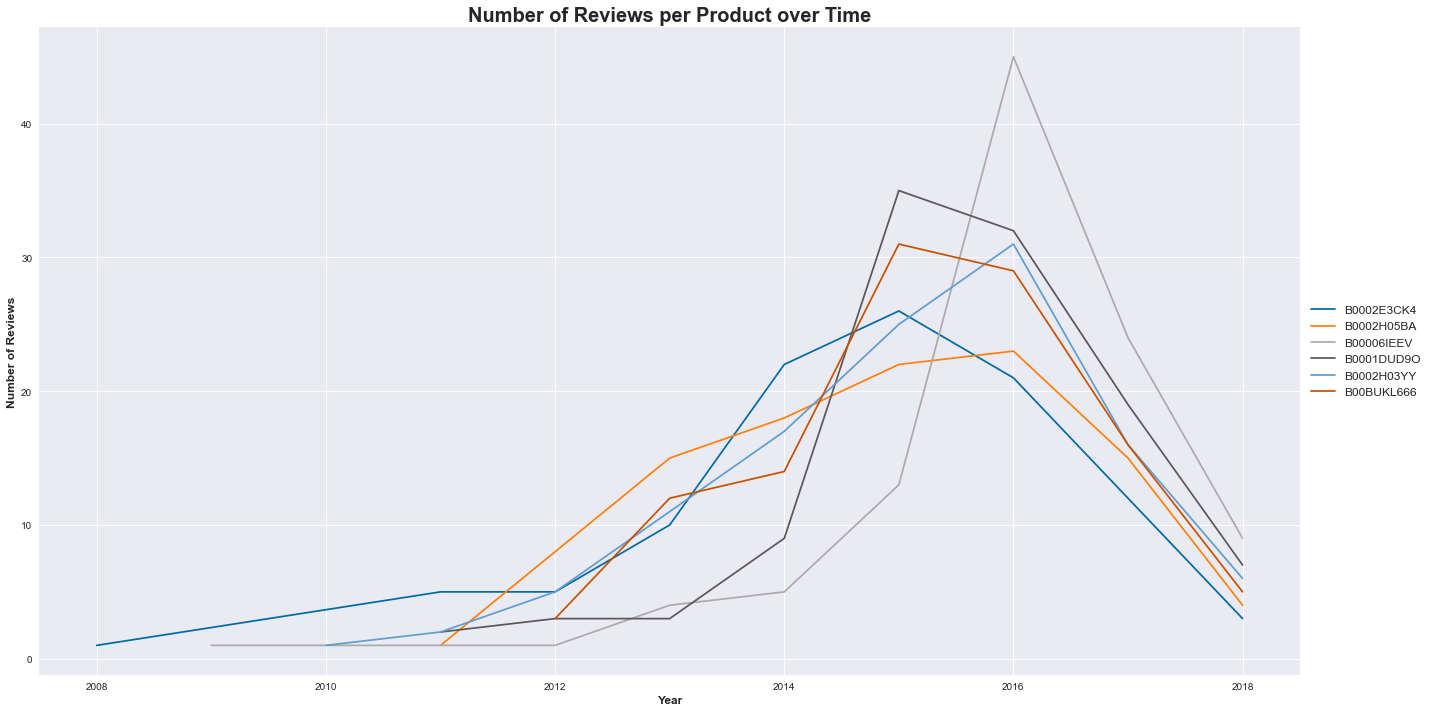

In [33]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_count[prod_year_count.asin==id].reviewYear, prod_year_count[prod_year_count.asin==id].count_rev, label=id)
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [34]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_count[prod_year_count.asin==id].reviewYear,
                             y=prod_year_count[prod_year_count.asin==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = prod_year_count[prod_year_count.asin==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc7_1_5_'></a>[Average Rating per Product over Time](#toc0_)

In [35]:
import pandas as pd

# Convert 'reviewTime' column to datetime
data['reviewTime'] = pd.to_datetime(data['reviewTime'])

# Filter data for products in 'asin'
filtered_data = data[data['asin'].isin(asin)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
prod_year_avg_rating = filtered_data.groupby(['asin', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
prod_year_avg_rating.avg_rating = np.round(prod_year_avg_rating.avg_rating, 3)
display(prod_year_avg_rating.head(5))


,asin,reviewYear,avg_rating
0,B00006IEEV,2009,5.000
1,B00006IEEV,2012,5.000
2,B00006IEEV,2013,5.000
3,B00006IEEV,2014,4.800
4,B00006IEEV,2015,4.615


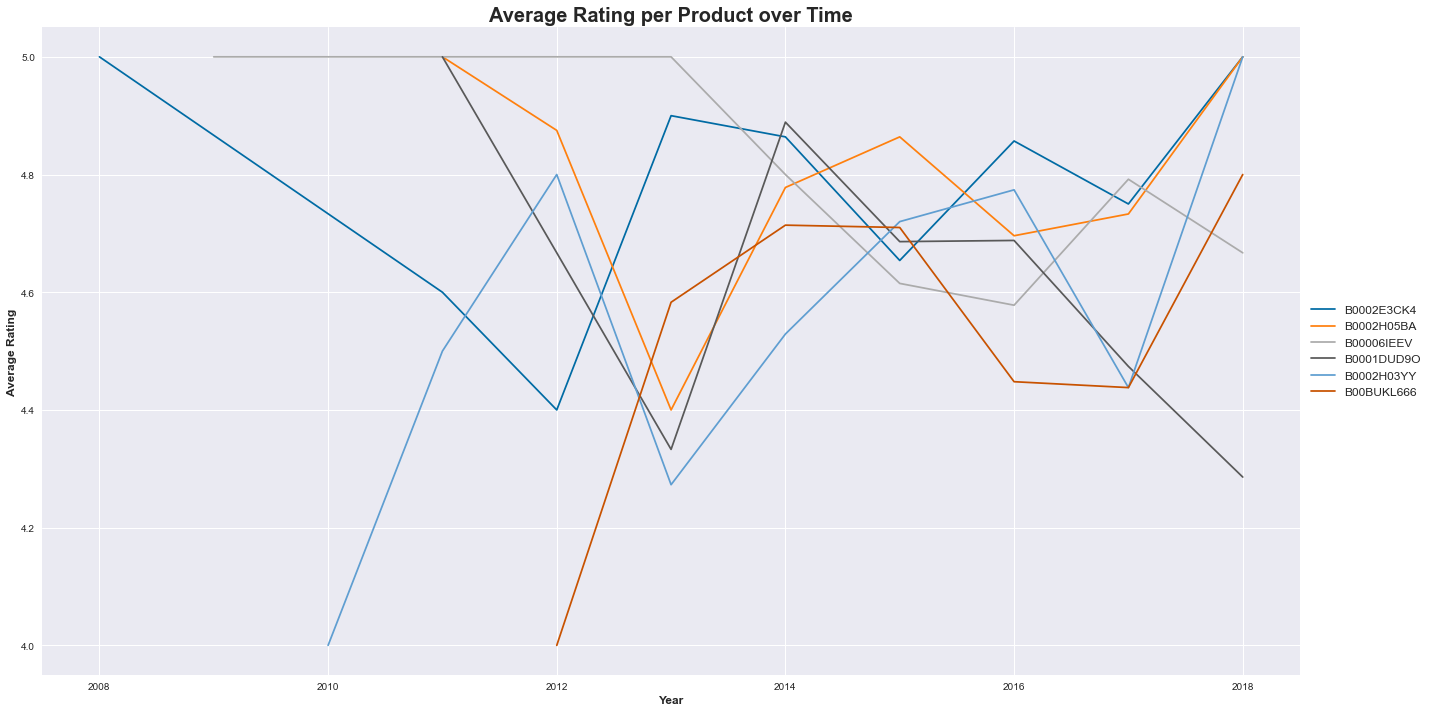

In [36]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(asin):
    plt.plot(prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear, prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating, label=id)
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Product over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [37]:
import plotly.graph_objects as go

fig = go.Figure()

for i, id in enumerate(asin):
    fig.add_trace(go.Scatter(x=prod_year_avg_rating[prod_year_avg_rating.asin==id].reviewYear,
                             y=prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = prod_year_avg_rating[prod_year_avg_rating.asin==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Product over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
# <a id='toc8_'></a>[Categories](#toc0_)

In [38]:
# How many items/products?
print("Number of Categories:", data.category.unique().size)

# Number reviews and average ratings per category
cat_count = data.groupby(['category']).agg({"overall": ["count", "mean"]})
cat_count.columns = ['count_rev', 'mean_rat']
cat_count['mean_rat'] = np.round(cat_count.mean_rat,3)
display(cat_count.sort_values(by='count_rev', ascending=False).head(10))

Number of Categories: 28


,count_rev,mean_rat
category,,
video_games,31289,4.233
arts_crafts,30840,4.579
office_products,29934,4.486
patio_lawn_and_garden,28150,4.346
grocery_and_gourmet_food,25970,4.452
cds_and_vinyl,25788,4.404
tools_and_home_improvement,23301,4.441
kindle_store,22445,4.387
movies_and_tv,18412,4.217


### <a id='toc8_1_1_'></a>[Categories by Average Rating](#toc0_)

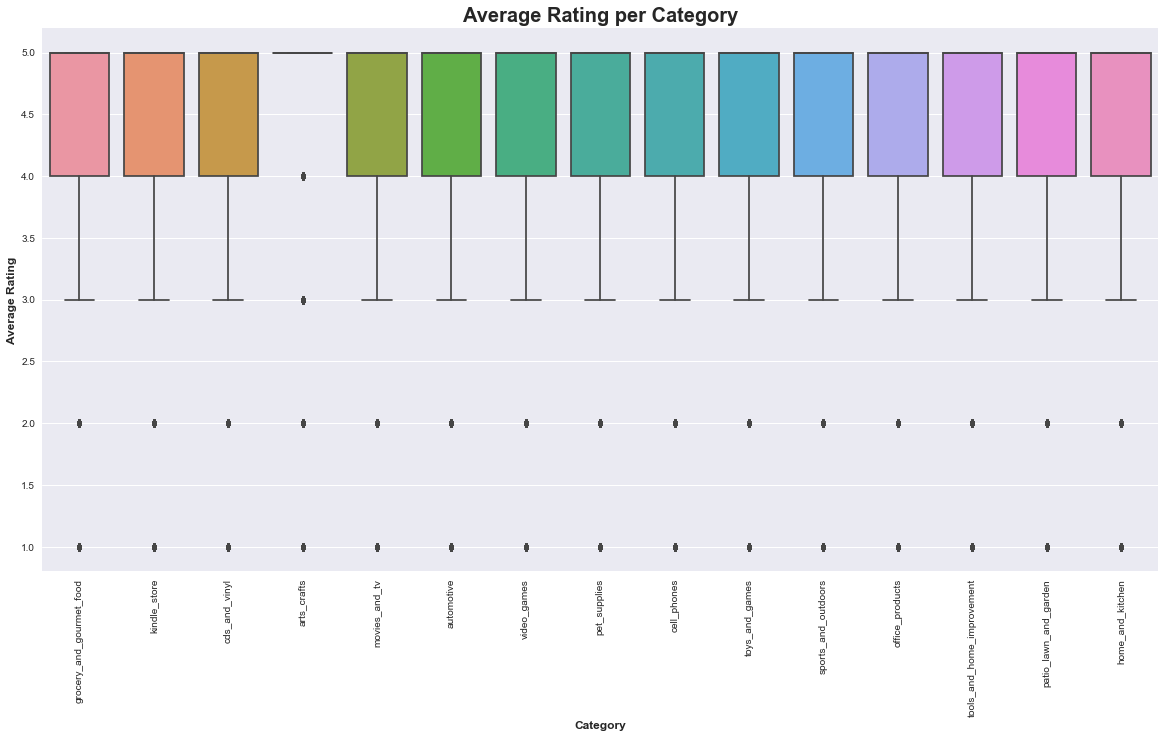

In [39]:
# boxplot of average rating per category using cat_count
fig = plt.figure(figsize=(20, 10))
sns.boxplot(x='category', y='overall', data=data[data.category.isin(cat_count.sort_values(by='count_rev', ascending=False).head(15).index)])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category", fontsize=20, fontweight='bold')
plt.show()


In [40]:
# get the average rating per category
data.groupby(['category'])['overall'].mean().reset_index(name='avg_rating')


,category,avg_rating
0,appliances,4.785714
1,arts_crafts,4.579280
2,automotive,4.488958
3,beauty,4.638095
4,cds_and_vinyl,4.403521
5,cell_phones,4.297919
6,clothing_shoes_and_jewelry,4.372442
7,digital_music,4.672471
8,electronics,4.350550
9,fashion,4.491228


### <a id='toc8_1_2_'></a>[Average Rating of Categories over Time](#toc0_)

In [41]:
# categories with more than 1000 reviews
categories = data.groupby(['category']).size()[data.groupby(['category']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate review count
cat_year_count = filtered_data.groupby(['category', 'reviewYear']).size().reset_index(name='count_rev')

# Display the result
display(cat_year_count.head(5))

,category,reviewYear,count_rev
0,arts_crafts,2004,1
1,arts_crafts,2006,4
2,arts_crafts,2007,5
3,arts_crafts,2008,5
4,arts_crafts,2009,24


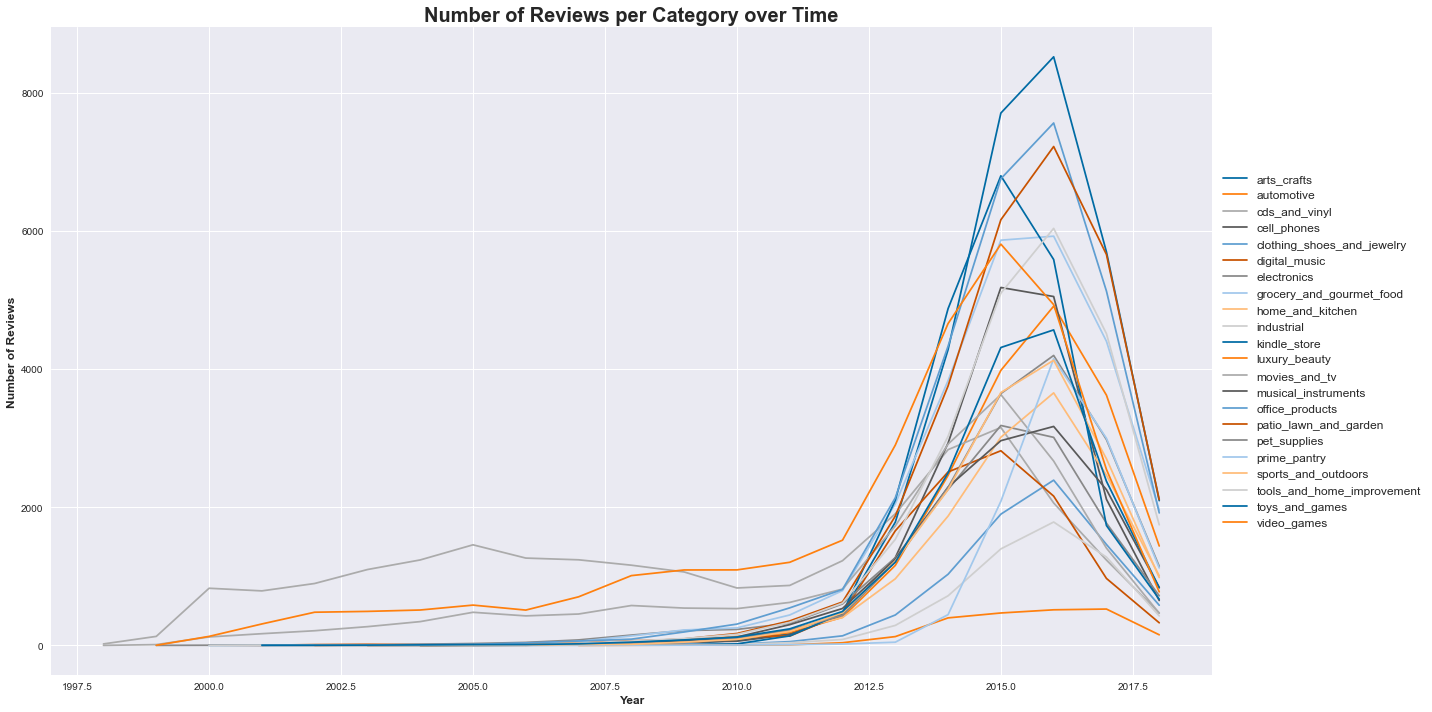

In [42]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_count[cat_year_count.category==id].reviewYear, cat_year_count[cat_year_count.category==id].count_rev, label=id)
    last_count = cat_year_count[cat_year_count.category==id].count_rev.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [43]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_count[cat_year_count.category==id].reviewYear,
                             y=cat_year_count[cat_year_count.category==id].count_rev,
                             mode='lines',
                             name=id))
    last_count = cat_year_count[cat_year_count.category==id].count_rev.iloc[-1]

fig.update_layout(
    title="Number of Reviews per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Number of Reviews"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()



### <a id='toc8_1_3_'></a>[Average Rating per Category over Time](#toc0_)

In [46]:
# categories with more than 1000 reviews
categories = data.groupby('category').size()[data.groupby(['category']).size()>1000].index

# Filter data for products in 'asin'
filtered_data = data[data['category'].isin(categories)]

# Extract year from 'reviewTime'
filtered_data['reviewYear'] = filtered_data['reviewTime'].dt.year

# Group by 'asin' and 'reviewYear', and calculate average rating
cat_year_avg_rating = filtered_data.groupby(['category', 'reviewYear'])['overall'].mean().reset_index(name='avg_rating')

# Display the result
cat_year_avg_rating.avg_rating = np.round(cat_year_avg_rating.avg_rating, 3)
display(cat_year_avg_rating.head(5))


,category,reviewYear,avg_rating
0,arts_crafts,2004,5.000
1,arts_crafts,2006,4.250
2,arts_crafts,2007,4.800
3,arts_crafts,2008,4.800
4,arts_crafts,2009,4.708


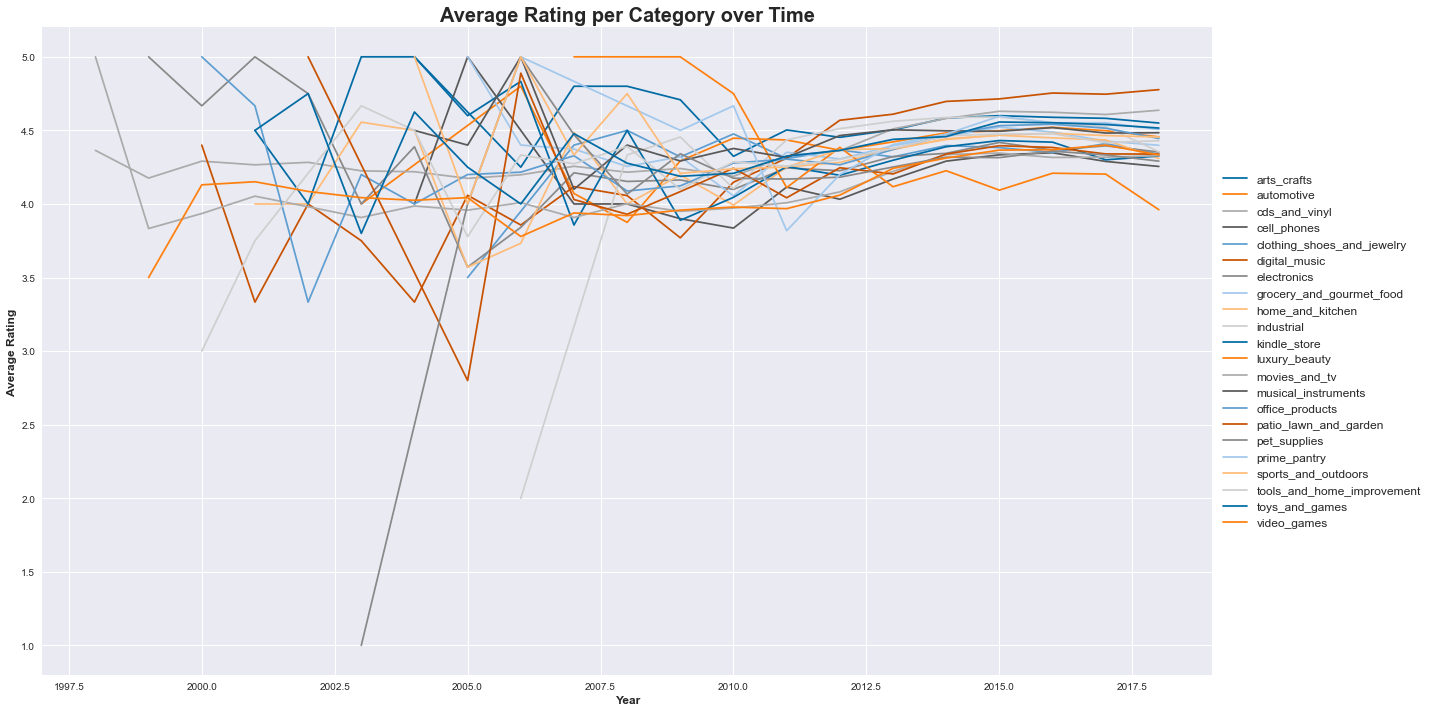

In [53]:
fig = plt.figure(figsize=(20, 10))
for i, id in enumerate(categories):
    plt.plot(cat_year_avg_rating[cat_year_avg_rating.category==id].reviewYear, cat_year_avg_rating[cat_year_avg_rating.category==id].avg_rating, label=id)
    last_count = cat_year_avg_rating[cat_year_avg_rating.category==id].avg_rating.iloc[-1]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Average Rating', fontsize=12, fontweight='semibold')
plt.title("Average Rating per Category over Time", fontsize=20, fontweight='bold')
plt.tight_layout()  # Ensures the legend is fully visible
plt.show()


In [55]:
fig = go.Figure()

for i, id in enumerate(categories):
    fig.add_trace(go.Scatter(x=cat_year_avg_rating[cat_year_avg_rating.category==id].reviewYear,
                             y=cat_year_avg_rating[cat_year_avg_rating.category==id].avg_rating,
                             mode='lines',
                             name=id))
    last_count = cat_year_avg_rating[cat_year_avg_rating.category==id].avg_rating.iloc[-1]

fig.update_layout(
    title="Average Rating per Category over Time",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Average Rating"),
    hovermode="x",
    height=800,  # Set the height of the figure (in pixels)
    width=1500   # Set the width of the figure (in pixels)
)

fig.show()


***
# <a id='toc9_'></a>[Reviews and Review Text](#toc0_)

### <a id='toc9_1_1_'></a>[Review Length vs Rating](#toc0_)

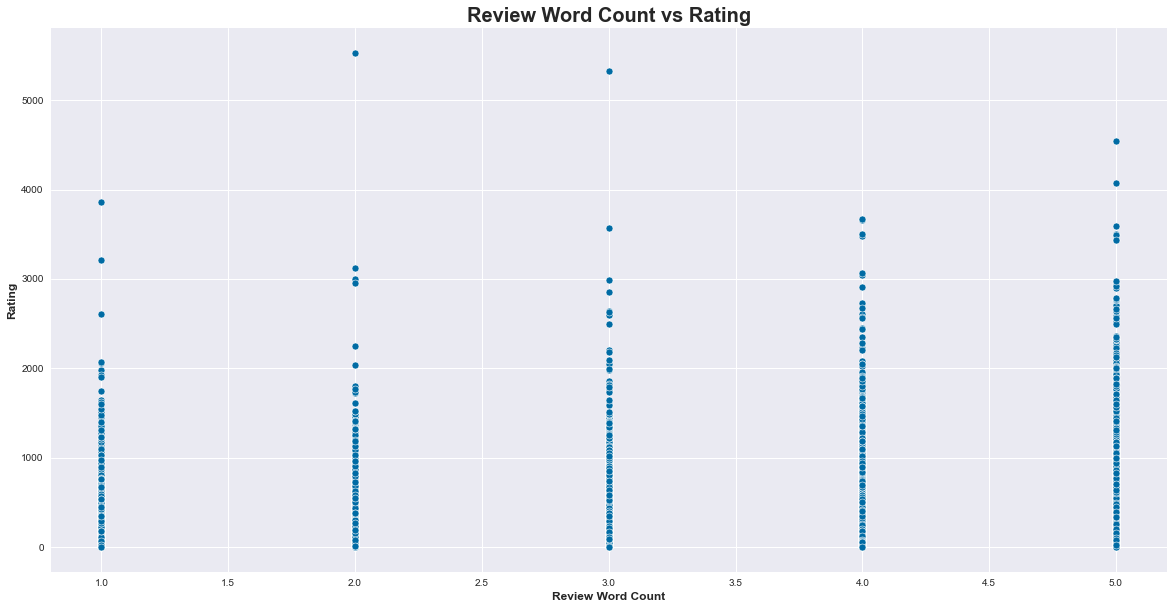

In [56]:
# scatter plot review_word_count vs overall
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(y='review_word_count', x='overall', data=data)
plt.xlabel('Review Word Count', fontsize=12, fontweight='semibold')
plt.ylabel('Rating', fontsize=12, fontweight='semibold')
plt.title("Review Word Count vs Rating", fontsize=20, fontweight='bold')
plt.show()

In [57]:
# get mean review_word_count per rating ()
data.groupby(['overall'])['review_word_count'].mean().reset_index(name='avg_review_word_count')


,overall,avg_review_word_count
0,1.0,81.590927
1,2.0,101.777357
2,3.0,100.673922
3,4.0,99.175366
4,5.0,57.042003


### <a id='toc9_1_2_'></a>[Top 10 Reviews by Length](#toc0_)

In [58]:
# see data
display(data[['reviewText', 'review_character_count', 'review_word_count', 'review_sentence_count']].head(3))

print(data.reviewText[0])
print(data.reviewText[1])
print(data.reviewText[2])

,reviewText,review_character_count,review_word_count,review_sentence_count
0,tuna yum,8,2,1
1,as someone that has always liked eating oatmea...,688,125,1
2,humans are stupid they love and they make mist...,510,102,1


tuna yum
as someone that has always liked eating oatmeal and mixing in oats into baked goods and other things these bars sounded delicious and in trying them i was not mistaken in my initial outward thought that being said i was really impressed with not only the taste but also the ingredients as these bars are chockfull of naturalgoodness and you really are able to get filled up by just eating one of these bars and you are not being burdened with huge amounts of calories either the snacks are portable and i can easily see myself sharing these bars within my kids lunches too if you have never tried these yourself i highly recommend them i received these for review  all opinions are my own
humans are stupid they love and they make mistakes they lie to themselves as well as to others they hurt the people who love them but sometimes they get it right finally get their acts together and its a brighter day for it this book hit every dark cloud before the sun ever dreamed to come out and i l

In [59]:
# top 10 longest reviews
display(data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10))

# view the review
data.sort_values(by='review_character_count', ascending=False)['reviewText'].head(10).values


59933     update  this machine is way overpriced now i g...
334656    at this point in its seventy five years of exi...
329307    intro do you like crpg are you a crpg fan if y...
297872    hey folks i love roleplaying games ive been pl...
314537    from its very first installment back in 1987 f...
179840    crc urgent enrollment cheat sheet services ahc...
247063    this is the tale of two double length episodes...
210399    alpha protocol is the new espionage rpg from o...
283794    since last gen its been almost five years sinc...
345856    warning b200 error i wrote this review on sept...
Name: reviewText, dtype: object

array(['update  this machine is way overpriced now i got mine for maybe 400 will check and write an updated note in the comments it wasnt worth the amount i paid much less the selling price now update  i finally gave up and reinstalled my prior mfc 9700 it scans well this 8480dn cannot scan directly from the machine but only from the computer however at least the 8480dn has a power button along with wire hookup in two ways parallel and usb it also allows you to configure it from the computer without having to use that horrible lcd menu but i gotta tell ya ill never buy another brother printer again they didnt learn any lessons from the insanity of the mfc 9700s frustrating interface update 32213 i upgraded one star for the printer because there is a way to make it do searchable pdf via its paperport function but the scanner itself cant do that you can do tht if you have acrobat its ocr function will also convert any google doc into searchable pdf yay finally i can search shakespeare an

### <a id='toc9_1_3_'></a>[Number of Reviews over Time](#toc0_)

In [60]:
# get number of reviews per year
year_data = data.copy()
year_data['reviewTime'] = data['reviewTime'].dt.year
year_count = year_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

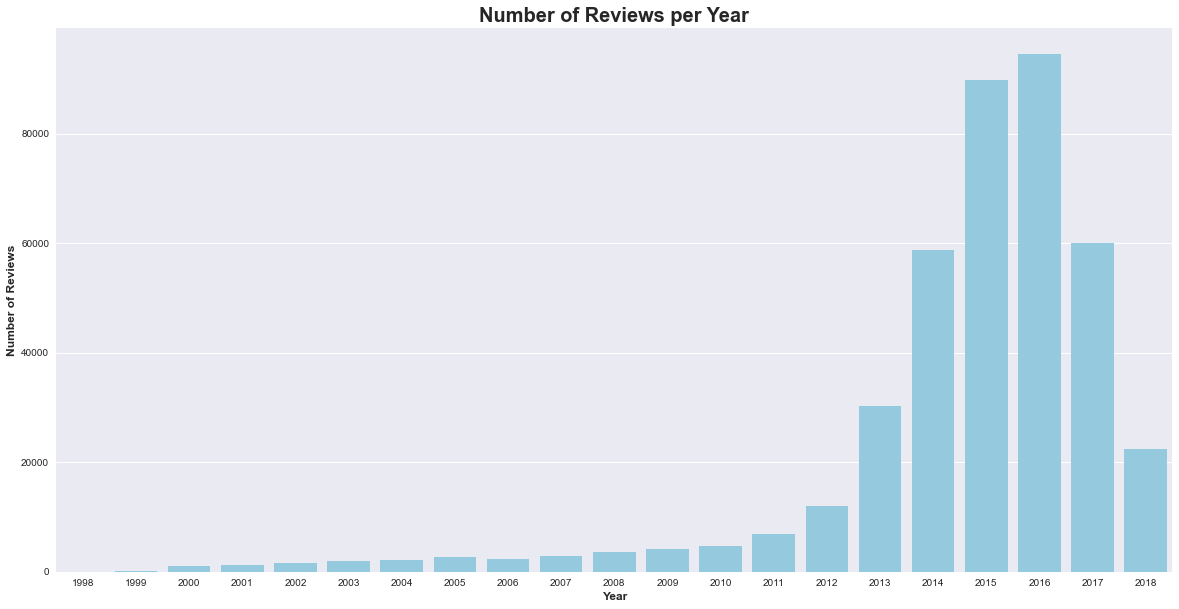

In [61]:
# plot number of reviews per year
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=year_count,  color='skyblue')
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Year", fontsize=20, fontweight='bold')
plt.show()

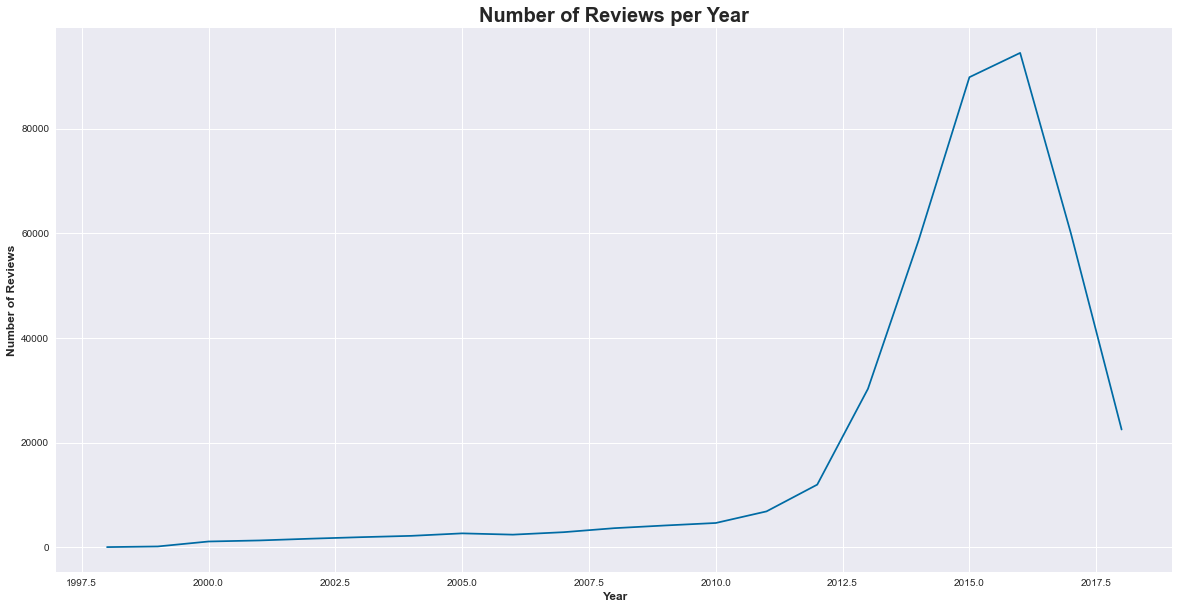

In [62]:
# line plot number of reviews per year
fig = plt.figure(figsize=(20, 10))
plt.plot(year_count.reviewTime, year_count.count_rev)
plt.xlabel('Year', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Year", fontsize=20, fontweight='bold')
plt.show()

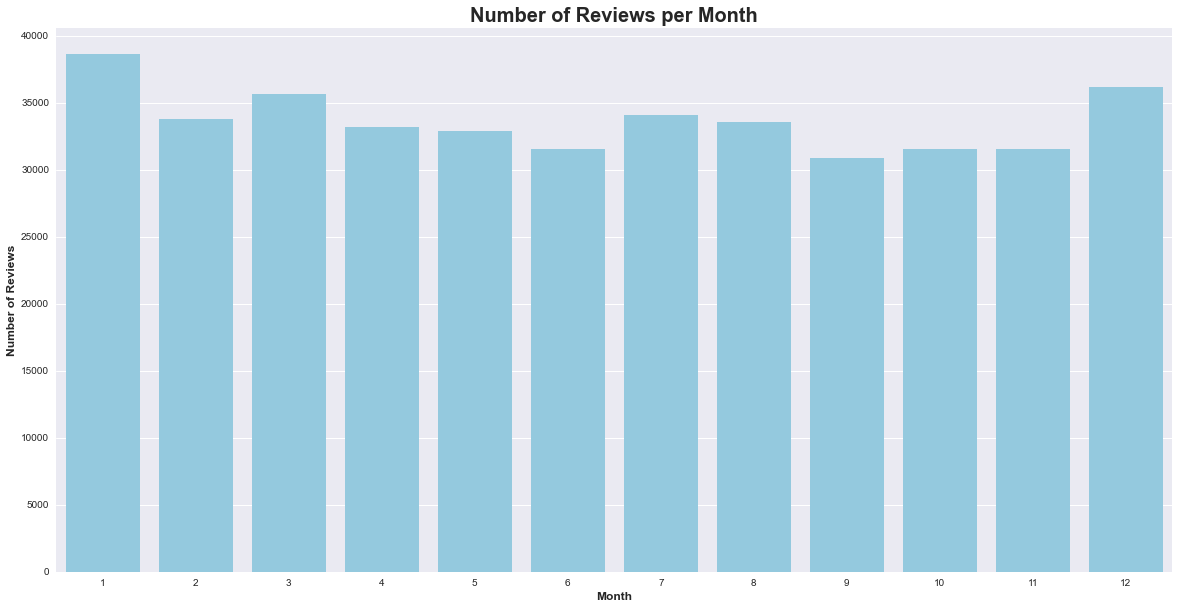

In [63]:
# get number of reviews per month
month_data = data.copy()
month_data['reviewTime'] = data['reviewTime'].dt.month
month_count = month_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

# plot number of reviews per month
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=month_count,  color='skyblue')
plt.xlabel('Month', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Month", fontsize=20, fontweight='bold')
plt.show()

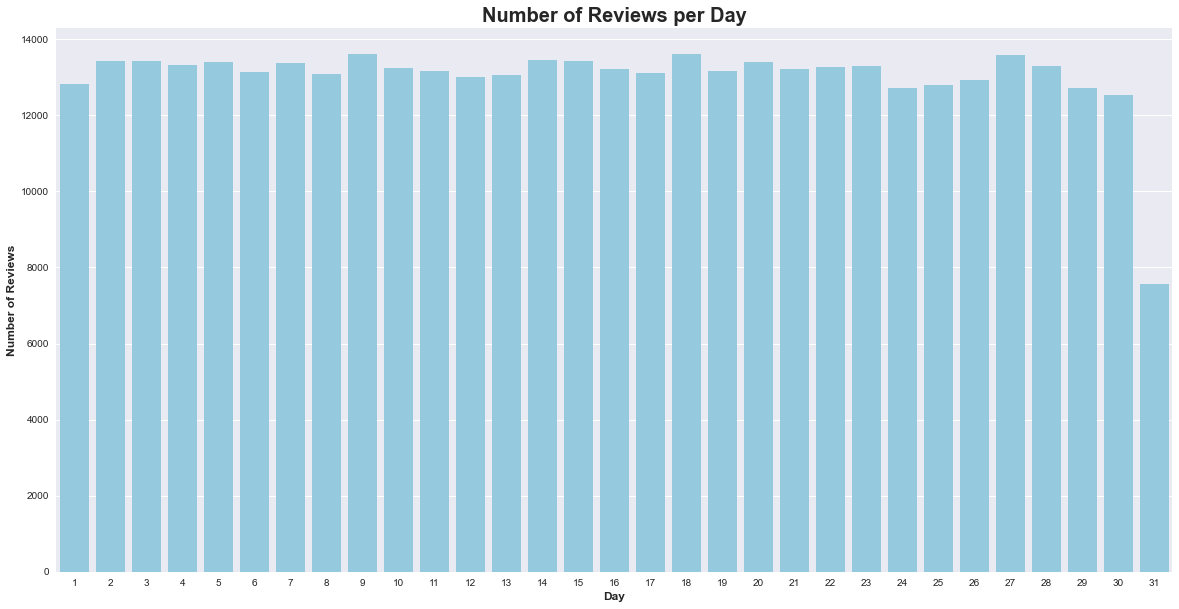

In [64]:
# number of reviews per day
day_data = data.copy()
day_data['reviewTime'] = data['reviewTime'].dt.day
day_count = day_data.groupby(['reviewTime']).size().reset_index(name='count_rev')

# plot number of reviews per day
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 10))
sns.barplot(x='reviewTime', y='count_rev', data=day_count,  color='skyblue')
plt.xlabel('Day', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
plt.title("Number of Reviews per Day", fontsize=20, fontweight='bold')
plt.show()

***
# <a id='toc11_'></a>[Sentiment Analysis](#toc0_)



***
## <a id='toc11_1_'></a>[Sentiment per Review](#toc0_)

In [67]:
data_sentiments = data[['reviewerID', 'reviewTime', 'asin', 'reviewText','category', 'overall', 'sentiments_vader_revText', 'sentiments_textblob_revText', 'sentiment_score_afinn_revText',
       'sentiment_score_bing_revText', 'sentiment_score_nrc_revText', 'review_word_count']]

# ensure a review has more than 10 words
data_sentiments = data_sentiments[data_sentiments.review_word_count > 10]

### <a id='toc11_1_1_'></a>[Most Positive Reviews](#toc0_)

In [68]:
# BING, AFINN & TextBlob (top 10 most positive reviews)
data_senti_bing = data_sentiments[['reviewText', 'sentiment_score_bing_revText']].sort_values(by='sentiment_score_bing_revText', ascending=False).head(10)
data_senti_afinn = data_sentiments[['reviewText', 'sentiment_score_afinn_revText']].sort_values(by='sentiment_score_afinn_revText', ascending=False).head(10)
data_senti_textblob = data_sentiments[['reviewText', 'sentiments_textblob_revText']].sort_values(by='sentiments_textblob_revText', ascending=False).head(10)

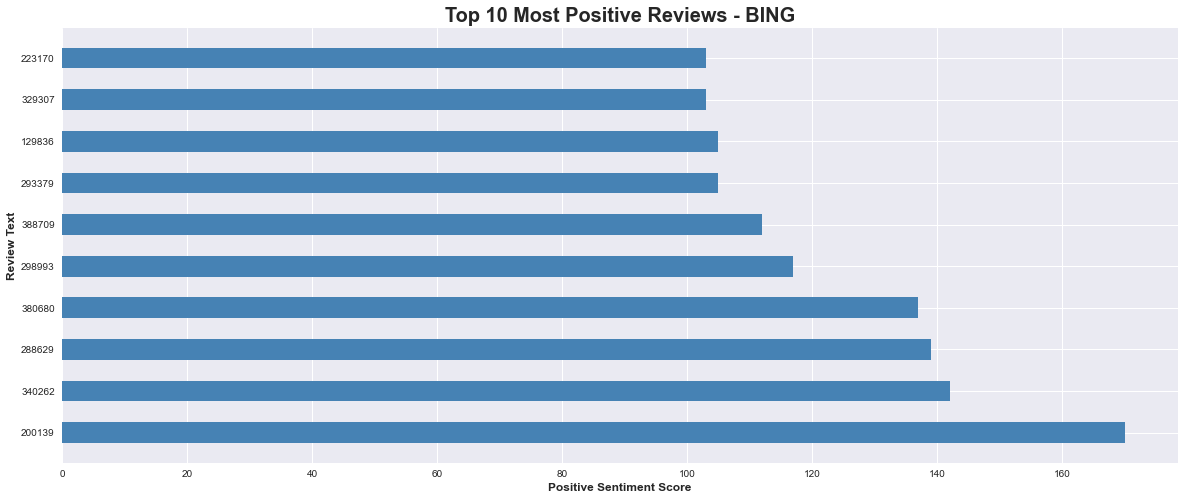

In [69]:
# BING (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_bing.index.astype(str), width=data_senti_bing['sentiment_score_bing_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - BING', fontsize=20, fontweight='bold')
plt.show()


In [70]:
# see these reviews
display(data_senti_bing.sort_values(by='sentiment_score_bing_revText', ascending=True))

,reviewText,sentiment_score_bing_revText
329307,intro do you like crpg are you a crpg fan if y...,103
223170,update 53116 i had to sell this amp and cabin...,103
293379,in france michel hazanavicius is best known fo...,105
129836,this is a beautiful product its appearance and...,105
388709,the second best exotic marigold hotel 2015 blu...,112
298993,happy feet two 3d 2011 2012 3d bluray 2d blu...,117
380680,you can fit me squarely in the latter camp and...,137
288629,thank you rhino this is a fascinating choice ...,139
340262,ah yes the zelda cycle is as reliable as the p...,142
200139,enchanted 2007 2008 bluray uk release an inst...,170


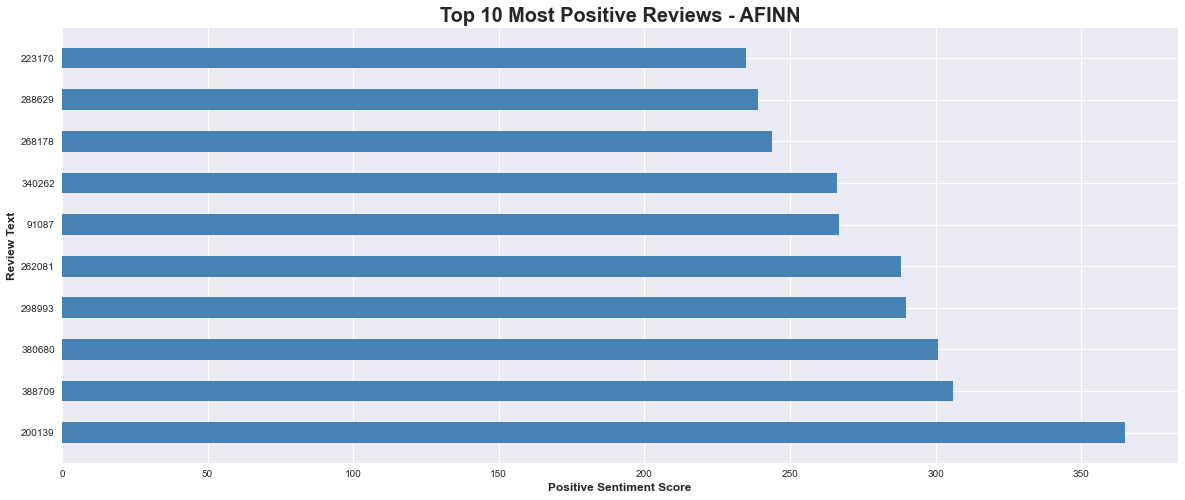

In [71]:
# AFINN (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_afinn.index.astype(str), width=data_senti_afinn['sentiment_score_afinn_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - AFINN', fontsize=20, fontweight='bold')
plt.show()


In [72]:
# see these reviews
display(data_senti_afinn.sort_values(by='sentiment_score_afinn_revText', ascending=True))

,reviewText,sentiment_score_afinn_revText
223170,update 53116 i had to sell this amp and cabin...,235
288629,thank you rhino this is a fascinating choice ...,239
268178,i first had a taste of arcade fire when my bro...,244
340262,ah yes the zelda cycle is as reliable as the p...,266
91087,you know ive been meaning to play a tommy jame...,267
262081,love the funko pop love the funko pop love the...,288
298993,happy feet two 3d 2011 2012 3d bluray 2d blu...,290
380680,you can fit me squarely in the latter camp and...,301
388709,the second best exotic marigold hotel 2015 blu...,306
200139,enchanted 2007 2008 bluray uk release an inst...,365


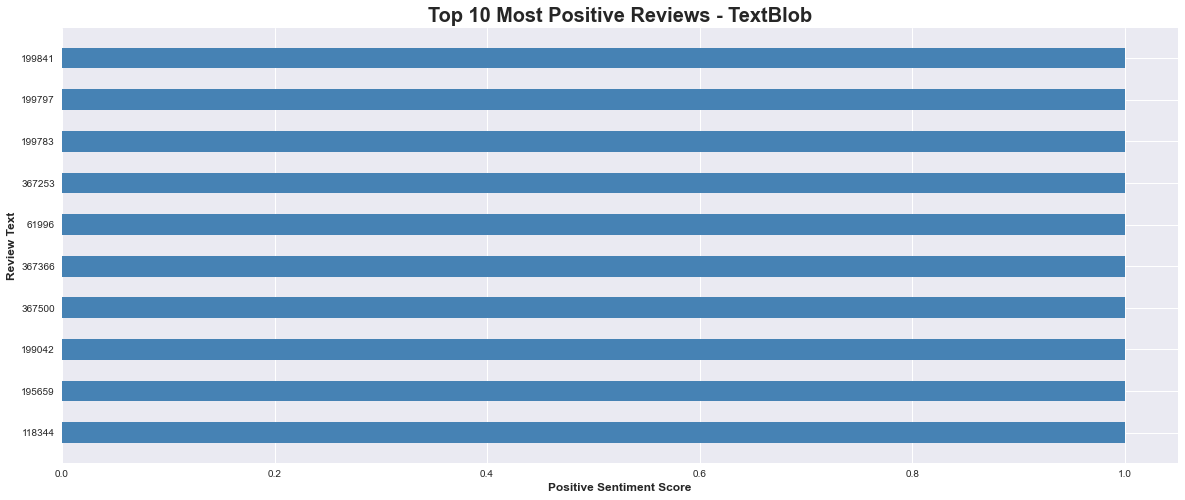

In [73]:
# TextBlob (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_textblob.index.astype(str), width=data_senti_textblob['sentiments_textblob_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - TextBlob', fontsize=20, fontweight='bold')
plt.show()


In [74]:
# see these reviews
display(data_senti_textblob.sort_values(by='sentiments_textblob_revText', ascending=True))

,reviewText,sentiments_textblob_revText
118344,excellent calendar i give it annually as a gif...,1.0
195659,perfect anything and everything i could ever a...,1.0
199042,excellent as always i did try an off brand ref...,1.0
367500,excellent before on time delivery we r memory ...,1.0
367366,the best mesh filter ive owned pool owner for ...,1.0
61996,perfect haloween costume perfect haloween cost...,1.0
367253,i had never heard of wade bowen saw him on cm...,1.0
199783,just yummy what else can i say except wonderfu...,1.0
199797,they worked perfectly in fixing my valance on ...,1.0
199841,awesome collectors set but beware of box condi...,1.0


### <a id='toc11_1_2_'></a>[Most Negative Reviews](#toc0_)

In [75]:
# BING, AFINN & TextBlob (top 10 most positive reviews)
data_senti_bing = data_sentiments[['reviewText', 'sentiment_score_bing_revText']].sort_values(by='sentiment_score_bing_revText', ascending=True).head(10)
data_senti_afinn = data_sentiments[['reviewText', 'sentiment_score_afinn_revText']].sort_values(by='sentiment_score_afinn_revText', ascending=True).head(10)
data_senti_textblob = data_sentiments[['reviewText', 'sentiments_textblob_revText']].sort_values(by='sentiments_textblob_revText', ascending=True).head(10)

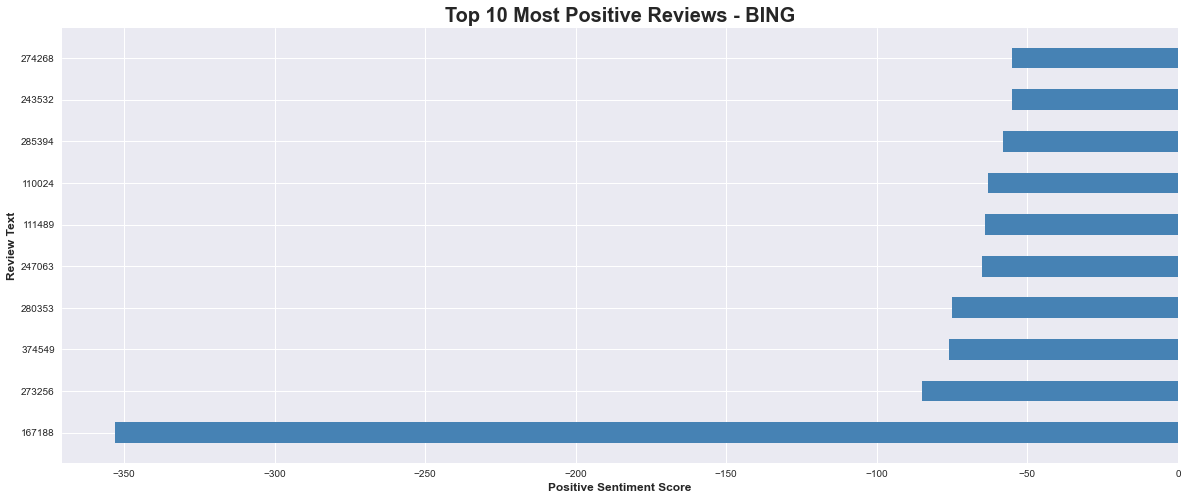

In [76]:
# BING (top 10 most negative reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_bing.index.astype(str), width=data_senti_bing['sentiment_score_bing_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - BING', fontsize=20, fontweight='bold')
plt.show()


In [77]:
display(data_senti_bing.sort_values(by='sentiment_score_bing_revText', ascending=False))


,reviewText,sentiment_score_bing_revText
243532,first off i absolutely love the crash bandicoo...,-55
274268,despite the fact that only one game is clearly...,-55
285394,ive gotten into the habit recently of watching...,-58
110024,ive already reviewed the wii version of this g...,-63
111489,may have mild spoilers i have now spent the pa...,-64
247063,this is the tale of two double length episodes...,-65
280353,what made me1 so great was that it took a grea...,-75
374549,as we get older we should mature mentally and ...,-76
273256,updated positive review i had to update my rev...,-85
167188,i hate this i hate this i hate this i hate thi...,-353


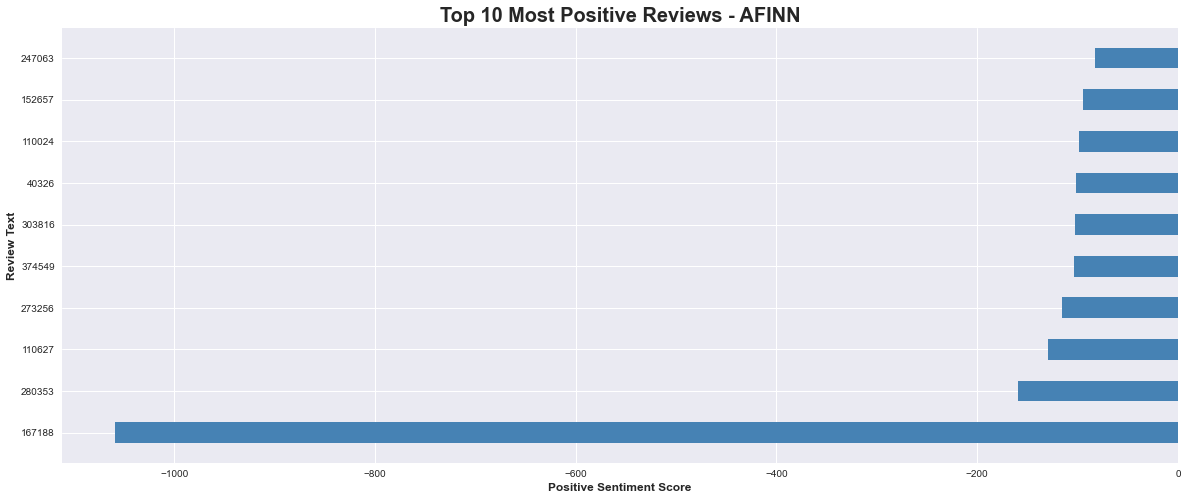

In [78]:
# AFINN (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))

ax.barh(y=data_senti_afinn.index.astype(str), width=data_senti_afinn['sentiment_score_afinn_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - AFINN', fontsize=20, fontweight='bold')
plt.show()


In [79]:
# see these reviews
display(data_senti_afinn.sort_values(by='sentiment_score_afinn_revText', ascending=False))

,reviewText,sentiment_score_afinn_revText
247063,this is the tale of two double length episodes...,-83
152657,its ironic that a game developed in poland wou...,-95
110024,ive already reviewed the wii version of this g...,-99
40326,blindness b001llh8se spoilers when a mysterio...,-102
303816,touching evil is a complex series of serial cr...,-103
374549,as we get older we should mature mentally and ...,-104
273256,updated positive review i had to update my rev...,-116
110627,the good its a rather good looking game the at...,-129
280353,what made me1 so great was that it took a grea...,-159
167188,i hate this i hate this i hate this i hate thi...,-1059


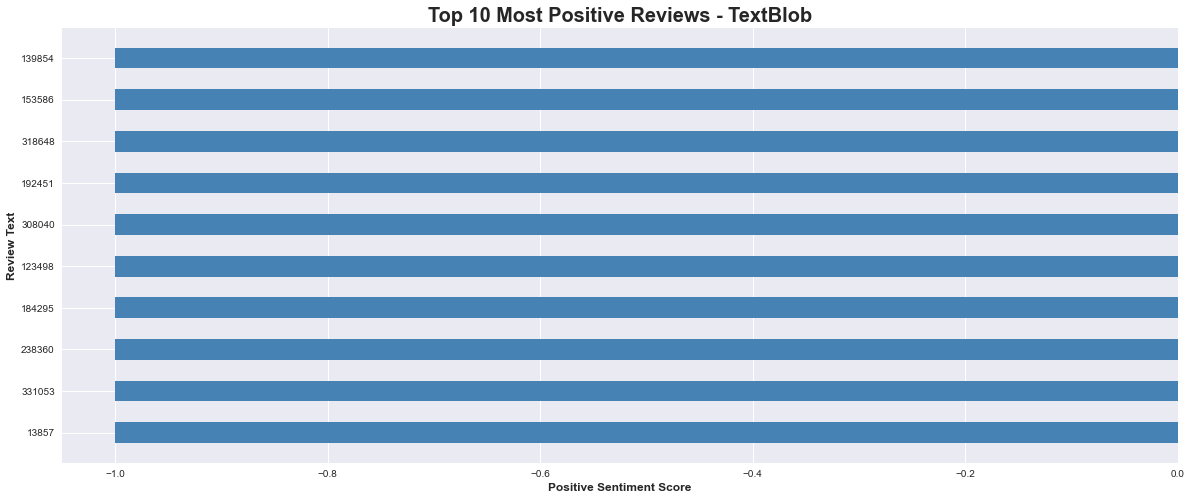

In [80]:
# TextBlob (top 10 most positive reviews)
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 8))


ax.barh(y=data_senti_textblob.index.astype(str), width=data_senti_textblob['sentiments_textblob_revText'], height=0.5, color='steelblue')
ax.set_xlabel('Positive Sentiment Score', fontsize=12, fontweight='semibold')
ax.set_ylabel('Review Text', fontsize=12, fontweight='semibold')
ax.set_title('Top 10 Most Positive Reviews - TextBlob', fontsize=20, fontweight='bold')
plt.show()

In [81]:
# see these reviews
display(data_senti_textblob.sort_values(by='sentiments_textblob_revText', ascending=False))

,reviewText,sentiments_textblob_revText
13857,took myself and neighborengineer to put this t...,-1.0
331053,the murder that happened and the investigation...,-1.0
238360,its tasty just wish they didnt use vegetable o...,-1.0
184295,this is horrible paint and like tinted whipped...,-1.0
123498,i have drank this coffee for yrs but this stuf...,-1.0
308040,terrible could not program anything and would ...,-1.0
192451,terrible product ink leaked all over my copier...,-1.0
318648,could not bring myself to continue drinking it...,-1.0
153586,movie is horrible horrible actingsoftcore movi...,-1.0
139854,horrible waist of time boring and just dont do...,-1.0


### <a id='toc11_1_3_'></a>[Most Positive Reviewers](#toc0_)

In [82]:
# Number reviews and sentiment per customer
cust_data = data_sentiments.groupby(['reviewerID']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})
cust_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
cust_data = np.round(cust_data, 2)
cust_data = cust_data[cust_data.count_rev > 10]

# Number reviews and sentiment per product
prod_data = data_sentiments.groupby(['asin']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})
prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
prod_data = np.round(prod_data, 2)
prod_data = prod_data[prod_data.count_rev > 10]



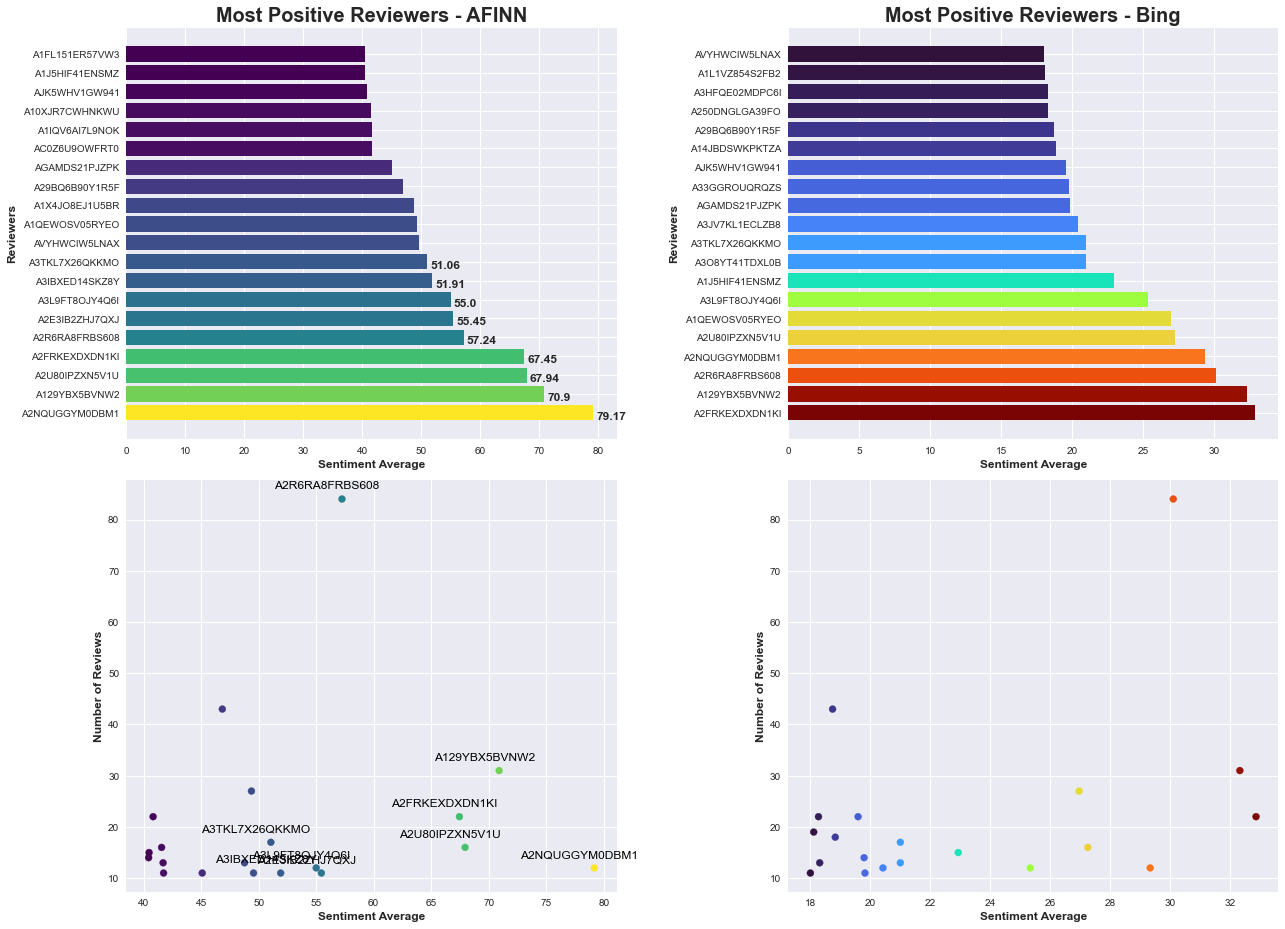

In [83]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))

# Most Positive - AFINN
cust_data1 = cust_data.sort_values(['mean_sent_afinn'], ascending=False)
cust_data1 = cust_data1.head(20)
sent_min = cust_data1.mean_sent_afinn.min() 
sent_max = cust_data1.mean_sent_afinn.max()
sent_norm = (cust_data1.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.viridis(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_afinn, color=colors_afinn)
plt.title("Most Positive Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 50:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data1.mean_sent_afinn, cust_data1.count_rev, c=colors_afinn, cmap='viridis')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_afinn[i] > 50:
        if id == "A2BMZRO0H7TFCS":
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Positive - BING
cust_data1 = cust_data.sort_values(['mean_sent_bing'], ascending=False).head(20)
sent_min = cust_data1.mean_sent_bing.min()
sent_max = cust_data1.mean_sent_bing.max()
sent_norm = (cust_data1.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.turbo(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_bing, color=colors_bing)
plt.title("Most Positive Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 35:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data1.mean_sent_bing, cust_data1.count_rev, c=colors_bing, cmap='turbo')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_bing[i] > 35:
        if (id == "A2BMZRO0H7TFCS") or (id == "A2VW4FYZILSXF2"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "A1N40I9TO33VDU"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


### <a id='toc11_1_4_'></a>[Most Negative Reviewers](#toc0_)

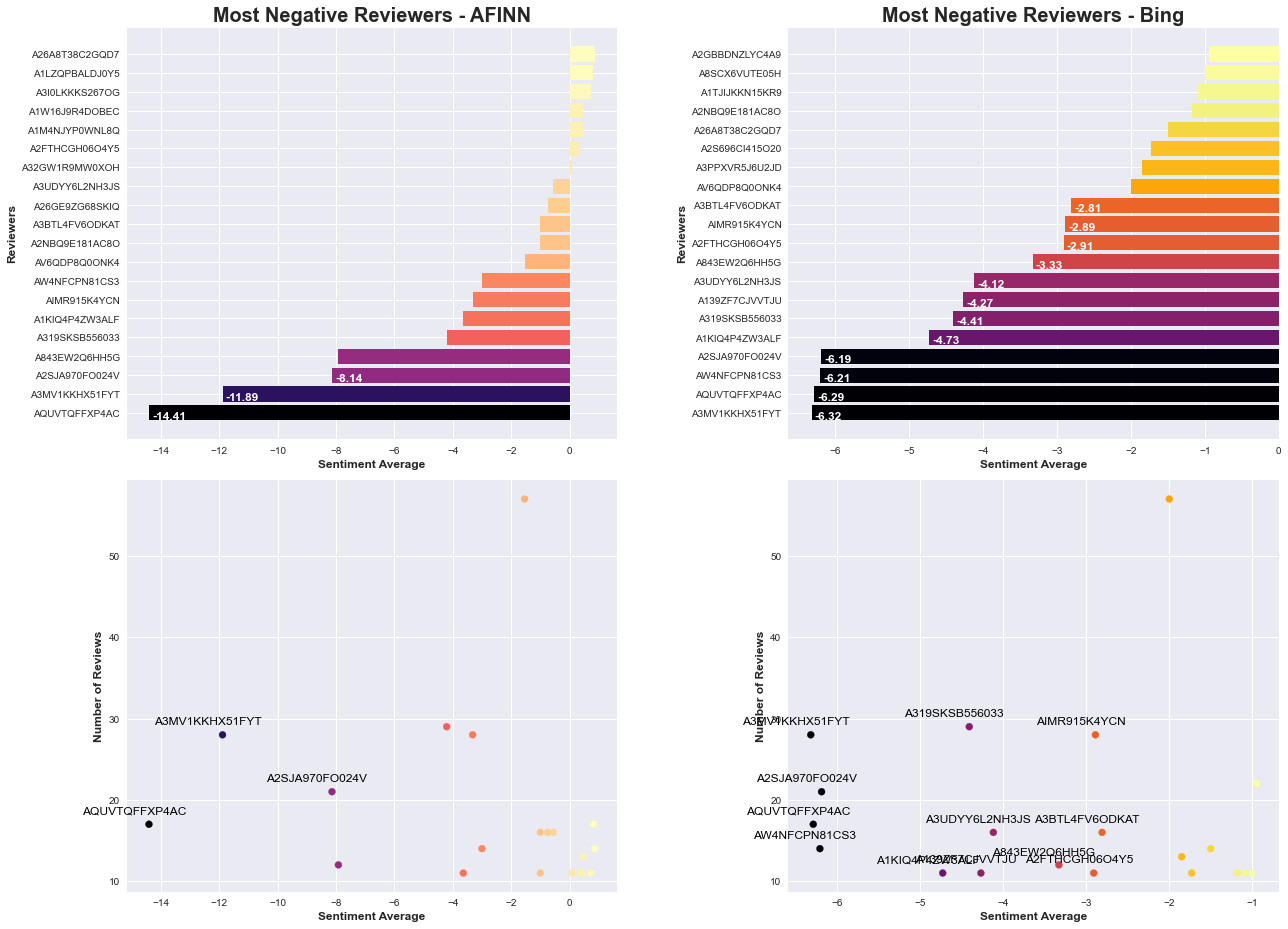

In [84]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))


# Most Negative - AFINN
cust_data2 = cust_data.sort_values(['mean_sent_afinn'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_afinn.min() 
sent_max = cust_data2.mean_sent_afinn.max()
sent_norm = (cust_data2.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.magma(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_afinn, color=colors_afinn)
plt.title("Most Negative Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -8:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data2.mean_sent_afinn, cust_data2.count_rev, c=colors_afinn, cmap='magma')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_afinn[i] < -8:
        if (id == "A3AHJVBTUQL67") or (id == "A1RDZP8TF1THTO") :
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "ABUD8RGA6AAC6"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(0,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Negative - BING
cust_data2 = cust_data.sort_values(['mean_sent_bing'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_bing.min()
sent_max = cust_data2.mean_sent_bing.max()
sent_norm = (cust_data2.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.inferno(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_bing, color=colors_bing)
plt.title("Most Negative Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -2:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data2.mean_sent_bing, cust_data2.count_rev, c=colors_bing, cmap='inferno')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_bing[i] < -2:
        if (id == "AXNBI9L5LHH6X") or (id == "A1L66FRXSW9MWZ"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


### <a id='toc11_1_5_'></a>[NRC Emotion Lexicon Analysis](#toc0_)

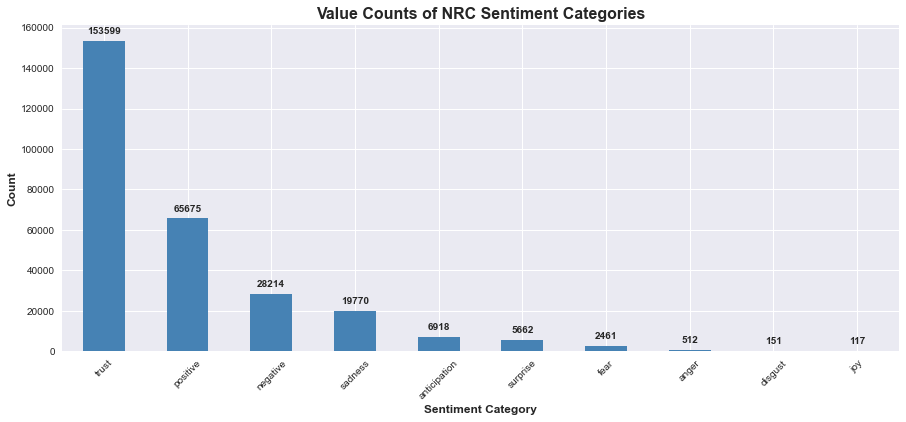

In [85]:
# Calculate value counts of each sentiment category
sentiment_nrc_counts = data_sentiments['sentiment_score_nrc_revText'].value_counts()

# Create a bar chart
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 6))
sentiment_nrc_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Sentiment Category', fontsize=12, fontweight='semibold')
plt.ylabel('Count', fontsize=12, fontweight='semibold')
plt.title('Value Counts of NRC Sentiment Categories', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Annotate the bars with their values
for i, count in enumerate(sentiment_nrc_counts):
    plt.annotate(f'{count}', xy=(i, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, fontweight='semibold')

plt.show()

## <a id='toc11_2_'></a>[VADER Lexicon Analysis](#toc0_)

In [86]:
# Convert the string representation of the dictionary to a dictionary
import ast
data_sentiments['sentiments_vader_revText'] = data_sentiments['sentiments_vader_revText'].apply(ast.literal_eval)

# Extract the 'pos', 'neg' and 'neu' values from the dictionary and create a new column 'pos_values', 'neg_values' and 'neu_values'
data_sentiments['pos_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('pos', 0))
data_sentiments['neg_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('neg', 0))
data_sentiments['neu_values_vader'] = data_sentiments['sentiments_vader_revText'].apply(lambda x: x.get('neu', 0))

### <a id='toc11_2_1_'></a>[Reviews](#toc0_)

In [87]:
data_sentiments.columns

Index(['reviewerID', 'reviewTime', 'asin', 'reviewText', 'category', 'overall',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_revText',
       'sentiment_score_nrc_revText', 'review_word_count', 'pos_values_vader',
       'neg_values_vader', 'neu_values_vader'],
      dtype='object')

In [88]:
# Sort the DataFrabme by 'pos_values' column in descending order for top 5 positive reviews with more than 5 words
display(data_sentiments[['reviewerID', 'reviewText', 'pos_values_vader']].sort_values(by='pos_values_vader', ascending=False).head(5))
display(data_sentiments[['reviewerID', 'reviewText', 'neg_values_vader']].sort_values(by='neg_values_vader', ascending=False).head(5))
display(data_sentiments[['reviewerID', 'reviewText', 'neu_values_vader']].sort_values(by='neu_values_vader', ascending=False).head(5))

,reviewerID,reviewText,pos_values_vader
236585,A3AWJBD4HB0KUJ,good good good good good good good good good g...,1.000
182990,A3AWJBD4HB0KUJ,good good good good good good good good good g...,1.000
256998,A3AWJBD4HB0KUJ,good good good good good good good good good g...,1.000
22461,AGRHVTZF0R7XP,i like song perfect perfect perfect perfect pe...,0.942
52037,AYYI6HYH1DQBP,great great great great great great great grea...,0.933


,reviewerID,reviewText,neg_values_vader
167188,A2KHLUW8GQXHRE,i hate this i hate this i hate this i hate thi...,0.766
71205,A1LCN5Q4P4IPLN,crapped out after a few usages and noisy noisy...,0.661
18658,ANCKC5ZKC9X21,bad just bad bad metal badly made and also cam...,0.660
206502,A1YD0XEOWL5EHO,bad nasty toxic smell defective hard to use pr...,0.639
72126,A3KFJL78DJQS88,wth is wrong with that evil bitch denise man i...,0.630


,reviewerID,reviewText,neu_values_vader
374778,A311JVLZEEWH1W,i use these to make fidget quilts for alzheime...,1.0
371854,A1J4284EHGBBAF,1st one came and didnt work more outsourced pr...,1.0
259141,A15YMPC9C9WM6P,this is a christmas request for my grandson i ...,1.0
201509,AHHRIH5E4QOL0,just what u needed already ordered more for my...,1.0
232003,A34HJ7GCZR91ZL,has scratches all over the both sides that gol...,1.0


### <a id='toc11_2_2_'></a>[Products](#toc0_)

In [89]:
# Number reviews and average ratings per product
prod_data = data_sentiments.groupby(['asin']).agg({"pos_values_vader": ["count", "mean"], "neg_values_vader": ["mean"], "neu_values_vader": ["mean"]})
prod_data.columns = ['count_rev', 'mean_rat_pos', 'mean_rat_neg', 'mean_rat_neu']
prod_data['mean_rat_pos'] = prod_data['mean_rat_pos'].round(2)
prod_data['mean_rat_neg'] = prod_data['mean_rat_neg'].round(2)
prod_data['mean_rat_neu'] = prod_data['mean_rat_neu'].round(2)
display(prod_data.sort_values(by='count_rev', ascending=False).head(10))

# only products with more than 100 reviews
prod_data = prod_data[prod_data.count_rev > 20]

,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
asin,,,,
B0002H03YY,80,0.21,0.04,0.75
B00006IEEV,76,0.23,0.03,0.74
B00BUKL666,73,0.29,0.04,0.67
B000W5QSYA,72,0.21,0.04,0.75
B0002H05BA,67,0.23,0.03,0.74
B0002E3CK4,64,0.21,0.05,0.74
B0006LOBA8,61,0.21,0.04,0.75
B0002E1NWI,61,0.20,0.03,0.77
B002UAF1PW,58,0.21,0.04,0.75


In [90]:
# most positive products
display(prod_data.sort_values(by='mean_rat_pos', ascending=False).head(5))

# most negative products
display(prod_data.sort_values(by='mean_rat_neg', ascending=False).head(5))

# most neutral products
display(prod_data.sort_values(by='mean_rat_neu', ascending=False).head(5))


,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
asin,,,,
B00RW0MZ6S,26,0.30,0.03,0.67
B00BUKL666,73,0.29,0.04,0.67
B004N2S2JM,30,0.29,0.02,0.68
B008QMX2SG,44,0.28,0.05,0.68
B0018NC2SQ,21,0.28,0.02,0.70


,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
asin,,,,
B00KVR4HEC,27,0.20,0.12,0.68
B00ARKS23A,26,0.11,0.12,0.77
B000FQ2DTA,28,0.18,0.12,0.70
B00Z7V9P8K,22,0.19,0.12,0.70
B00178630A,33,0.15,0.11,0.74


,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
asin,,,,
B00WW8KIRI,23,0.13,0.02,0.85
B000B7Q9KM,22,0.12,0.03,0.85
B000CITK8S,38,0.14,0.04,0.83
B00450DVDY,24,0.13,0.04,0.82
B000VXO4L2,21,0.17,0.01,0.82


### <a id='toc11_2_3_'></a>[ Categories](#toc0_)

In [93]:
# Number reviews and average ratings per product
cat_data = data_sentiments.groupby(['category']).agg({"pos_values_vader": ["count", "mean"], "neg_values_vader": ["mean"], "neu_values_vader": ["mean"]})
cat_data.columns = ['count_rev', 'mean_rat_pos', 'mean_rat_neg', 'mean_rat_neu']
cat_data['mean_rat_pos'] = cat_data['mean_rat_pos'].round(2)
cat_data['mean_rat_neg'] = cat_data['mean_rat_neg'].round(2)
cat_data['mean_rat_neu'] = cat_data['mean_rat_neu'].round(2)
display(cat_data.sort_values(by='count_rev', ascending=False).head(10))

# only categories with more than 1000 reviews
cat_data = cat_data[cat_data.count_rev > 1000]

,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
category,,,,
video_games,23292,0.20,0.07,0.73
cds_and_vinyl,21253,0.20,0.05,0.76
kindle_store,21142,0.22,0.06,0.73
office_products,19796,0.19,0.04,0.77
patio_lawn_and_garden,19099,0.17,0.05,0.78
arts_crafts,18326,0.22,0.04,0.74
grocery_and_gourmet_food,17699,0.22,0.04,0.74
tools_and_home_improvement,16174,0.18,0.05,0.77
movies_and_tv,13487,0.20,0.07,0.73


In [94]:
# most positive products
display(cat_data.sort_values(by='mean_rat_pos', ascending=False).head(5))

# most negative products
display(cat_data.sort_values(by='mean_rat_neg', ascending=False).head(5))

# most neutral products
display(cat_data.sort_values(by='mean_rat_neu', ascending=False).head(5))

,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
category,,,,
digital_music,5766,0.25,0.04,0.72
toys_and_games,11482,0.23,0.04,0.73
prime_pantry,4910,0.23,0.04,0.73
clothing_shoes_and_jewelry,5497,0.23,0.04,0.73
arts_crafts,18326,0.22,0.04,0.74


,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
category,,,,
video_games,23292,0.20,0.07,0.73
movies_and_tv,13487,0.20,0.07,0.73
kindle_store,21142,0.22,0.06,0.73
patio_lawn_and_garden,19099,0.17,0.05,0.78
cds_and_vinyl,21253,0.20,0.05,0.76


,count_rev,mean_rat_pos,mean_rat_neg,mean_rat_neu
category,,,,
luxury_beauty,2068,0.18,0.04,0.78
electronics,10227,0.17,0.05,0.78
industrial,3649,0.17,0.05,0.78
patio_lawn_and_garden,19099,0.17,0.05,0.78
tools_and_home_improvement,16174,0.18,0.05,0.77


## <a id='toc11_3_'></a>[Distribution of Sentiment Scores](#toc0_)

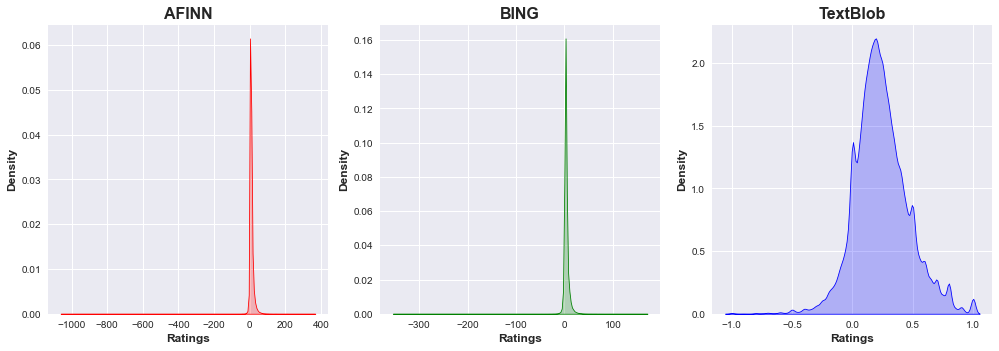

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
sns.set_context("paper", font_scale=1.1)

sns.kdeplot(data_sentiments['sentiment_score_afinn_revText'], color="Red", shade=True, ax=axes[0])
axes[0].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[0].set_title('AFINN', fontsize=16, fontweight='bold')

sns.kdeplot(data_sentiments['sentiment_score_bing_revText'], color="Green", shade=True, ax=axes[1])
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[1].set_title('BING', fontsize=16, fontweight='bold')

sns.kdeplot(data_sentiments['sentiments_textblob_revText'], color="Blue", shade=True, ax=axes[2])
axes[2].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Ratings', fontsize=12, fontweight='bold')
axes[2].set_title('TextBlob', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


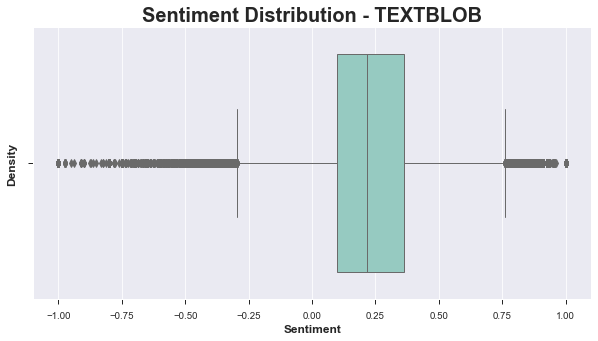

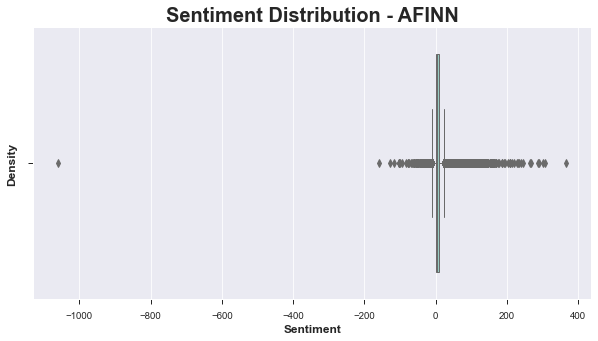

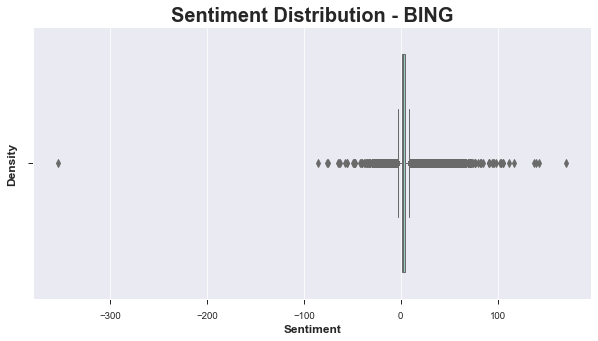

In [97]:
# plot a boxplot using seaborn for TEXTBLOB, AFNINN and BING
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiments_textblob_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - TEXTBLOB", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiment_score_afinn_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_sentiments, x='sentiment_score_bing_revText', palette="Set3", linewidth=1)
plt.title("Sentiment Distribution - BING", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='semibold')
plt.ylabel("Density", fontsize=12, fontweight='semibold')
plt.show()


In [98]:
print("Sentiment Distribution - AFINN")
display(data_sentiments['sentiment_score_afinn_revText'].describe())

print("\nSentiment Distribution - BING")
display(data_sentiments['sentiment_score_bing_revText'].describe())

print("\nSentiment Distribution - TEXTBLOB")
display(data_sentiments['sentiments_textblob_revText'].describe())

Sentiment Distribution - AFINN


count    283079.000000
mean          7.407310
std          10.622119
min       -1059.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         365.000000
Name: sentiment_score_afinn_revText, dtype: float64


Sentiment Distribution - BING


count    283079.000000
mean          3.201375
std           5.003763
min        -353.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         170.000000
Name: sentiment_score_bing_revText, dtype: float64


Sentiment Distribution - TEXTBLOB


count    283079.000000
mean          0.238401
std           0.224584
min          -1.000000
25%           0.100000
50%           0.218297
75%           0.364326
max           1.000000
Name: sentiments_textblob_revText, dtype: float64

***
## <a id='toc11_4_'></a>[Sentiment per Product](#toc0_)

In [99]:
# Number reviews and sentiment per product - more than 20 reviews per product
prod_data = data_sentiments.groupby(['asin']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})

prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
prod_data = prod_data[prod_data['count_rev'] > 20]
prod_data = np.round(prod_data, 2)

### <a id='toc11_4_1_'></a>[Most Positive Products](#toc0_)

In [100]:
# most postive products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(prod_data.sort_values(['mean_sent_bing'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B000ERVMI8         21            24.67            9.95                0.20
B0009VXBAQ         37            20.00            7.08                0.24
B00005TNI6         23            19.13            6.39                0.09
B000XJNTNS         30            16.33            6.83                0.10
B000FO4KO8         24            14.29            7.50                0.17


Most Positive Products by Average Sentiment Score - BING
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B000ERVMI8         21            24.67            9.95                0.20
B000FO4KO8         24            14.29            7.50                0.17
B0002XL3BA         25            12.04            7.16    

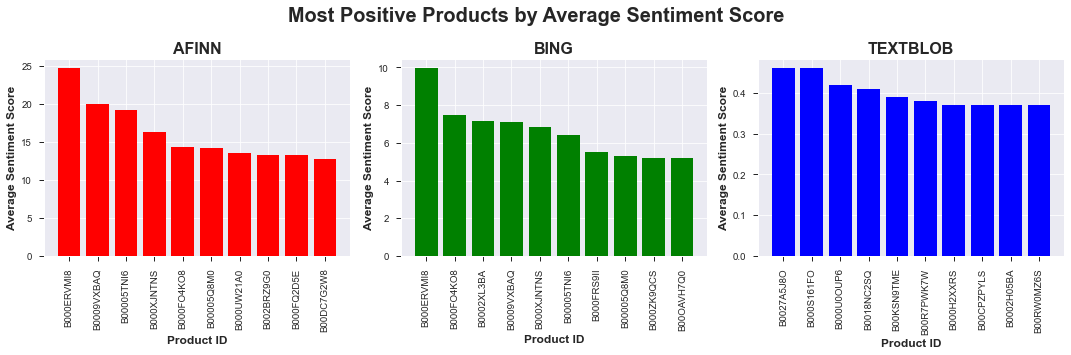

In [101]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_afinn'], ascending=False).head(10).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(prod_data.sort_values(['mean_sent_bing'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_bing'], ascending=False).head(10).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(10).index, prod_data.sort_values(['mean_sent_textblob'], ascending=False).head(10).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Positive Products by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


### <a id='toc11_4_2_'></a>[Most Negative Products](#toc0_)



In [102]:
# most negative products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(prod_data.sort_values(['mean_sent_bing'], ascending=True).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B00ARKS23A         26            -0.62           -0.27                0.13
B00004R9VV         48             1.17           -0.71                0.12
B005NF5NTK         21             1.33            1.24                0.24
B000CITK8S         38             2.05            2.55                0.29
B000W72GBC         25             2.20            1.32                0.24


Most Positive Products by Average Sentiment Score - BING
            count_rev  mean_sent_afinn  mean_sent_bing  mean_sent_textblob
asin                                                                      
B00004R9VV         48             1.17           -0.71                0.12
B00ARKS23A         26            -0.62           -0.27                0.13
B00KVR4HEC         27             5.67           -0.04    

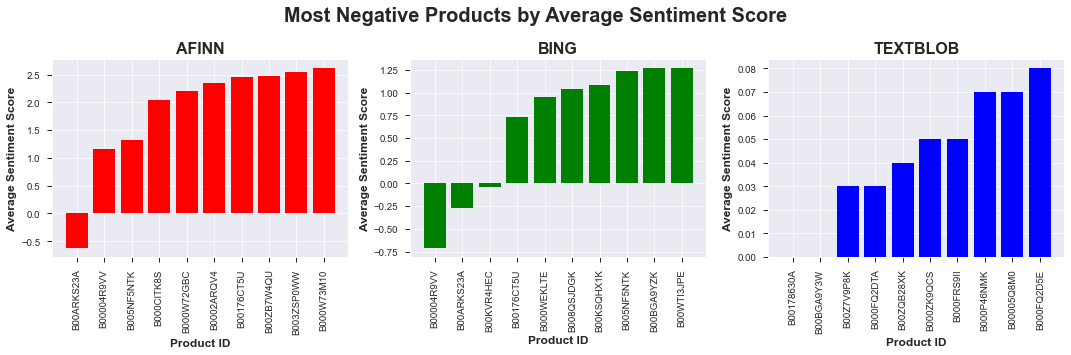

In [103]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_afinn'], ascending=True).head(10).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(prod_data.sort_values(['mean_sent_bing'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_bing'], ascending=True).head(10).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(10).index, prod_data.sort_values(['mean_sent_textblob'], ascending=True).head(10).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Negative Products by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

***
## <a id='toc11_5_'></a>[Sentiment per Category](#toc0_)

In [104]:
data_sentiments.columns

Index(['reviewerID', 'reviewTime', 'asin', 'reviewText', 'category', 'overall',
       'sentiments_vader_revText', 'sentiments_textblob_revText',
       'sentiment_score_afinn_revText', 'sentiment_score_bing_revText',
       'sentiment_score_nrc_revText', 'review_word_count', 'pos_values_vader',
       'neg_values_vader', 'neu_values_vader'],
      dtype='object')

In [106]:
#  get average sentiment score per product category (more than 20 reviews per category)
cat_data = data_sentiments.groupby(['category']).agg({"sentiment_score_afinn_revText": ["count", "mean"], "sentiment_score_bing_revText": ["mean"], "sentiments_textblob_revText": ["mean"]})

cat_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing', 'mean_sent_textblob']
cat_data = cat_data[cat_data['count_rev'] > 20]
cat_data = np.round(cat_data, 2)

### <a id='toc11_5_1_'></a>[Most Positive Categories](#toc0_)

In [107]:
# most postive products by average sentiment score
print("Most Positive Products by Average Sentiment Score - AFINN")
print(cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - BING")
print(cat_data.sort_values(['mean_sent_bing'], ascending=False).head(5))
print("\n")

print("Most Positive Products by Average Sentiment Score - TEXTBLOB")
print(cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(5))
print("\n")

Most Positive Products by Average Sentiment Score - AFINN
                        count_rev  mean_sent_afinn  mean_sent_bing  \
category                                                             
cds_and_vinyl               21253            14.93            6.53   
magazine_subscriptions        111            10.67            4.20   
beauty                         86            10.40            4.78   
video_games                 23292            10.22            3.62   
luxury_beauty                2068            10.21            4.54   

                        mean_sent_textblob  
category                                    
cds_and_vinyl                         0.26  
magazine_subscriptions                0.26  
beauty                                0.25  
video_games                           0.13  
luxury_beauty                         0.21  


Most Positive Products by Average Sentiment Score - BING
                        count_rev  mean_sent_afinn  mean_sent_bing  \
categor

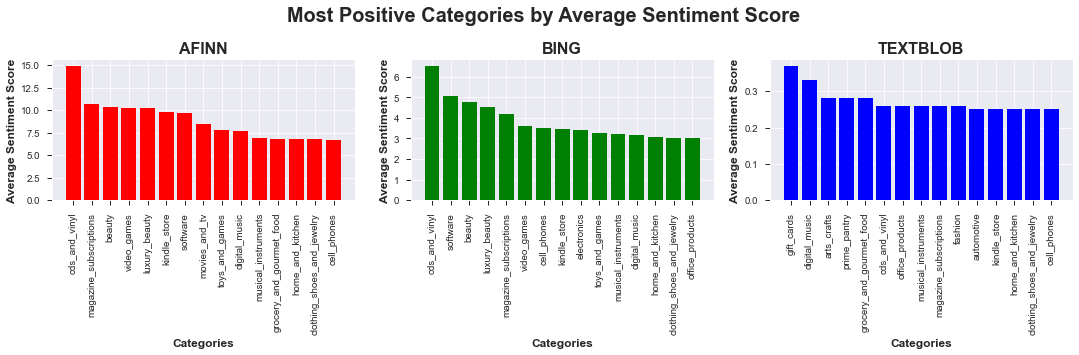

In [108]:
# bar plot for the most positive products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_afinn'], ascending=False).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(cat_data.sort_values(['mean_sent_bing'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_bing'], ascending=False).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).index, cat_data.sort_values(['mean_sent_textblob'], ascending=False).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Positive Categories by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


### <a id='toc11_5_2_'></a>[Most Negative Categories](#toc0_)



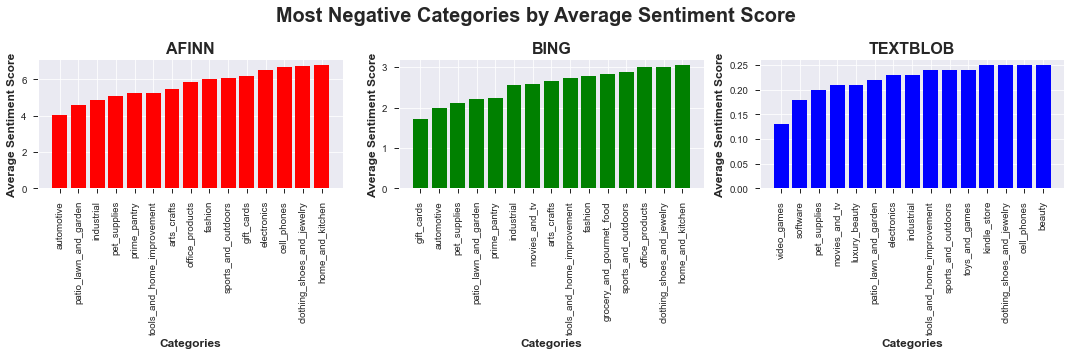

In [109]:
# bar plot for the most negative products by average sentiment score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(cat_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_afinn'], ascending=True).head(15).mean_sent_afinn, color='red')
plt.title("AFINN", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(cat_data.sort_values(['mean_sent_bing'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_bing'], ascending=True).head(15).mean_sent_bing, color='green')
plt.title("BING", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(cat_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).index, cat_data.sort_values(['mean_sent_textblob'], ascending=True).head(15).mean_sent_textblob, color='blue')
plt.title("TEXTBLOB", fontsize=16, fontweight='bold')
plt.xlabel("Categories", fontsize=12, fontweight='semibold')
plt.ylabel("Average Sentiment Score", fontsize=12, fontweight='semibold')
plt.xticks(rotation=90)

# add overall title
plt.suptitle("Most Negative Categories by Average Sentiment Score", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

## <a id='toc11_7_'></a>[Comparing Lexicons](#toc0_)

Correlation with rating scores: If you have numerical rating scores associated with the review texts, you can compute the correlation between the sentiment predicted by each sentiment lexicon and the rating scores. A higher correlation suggests that the sentiment lexicon captures the underlying sentiment expressed in the ratings.


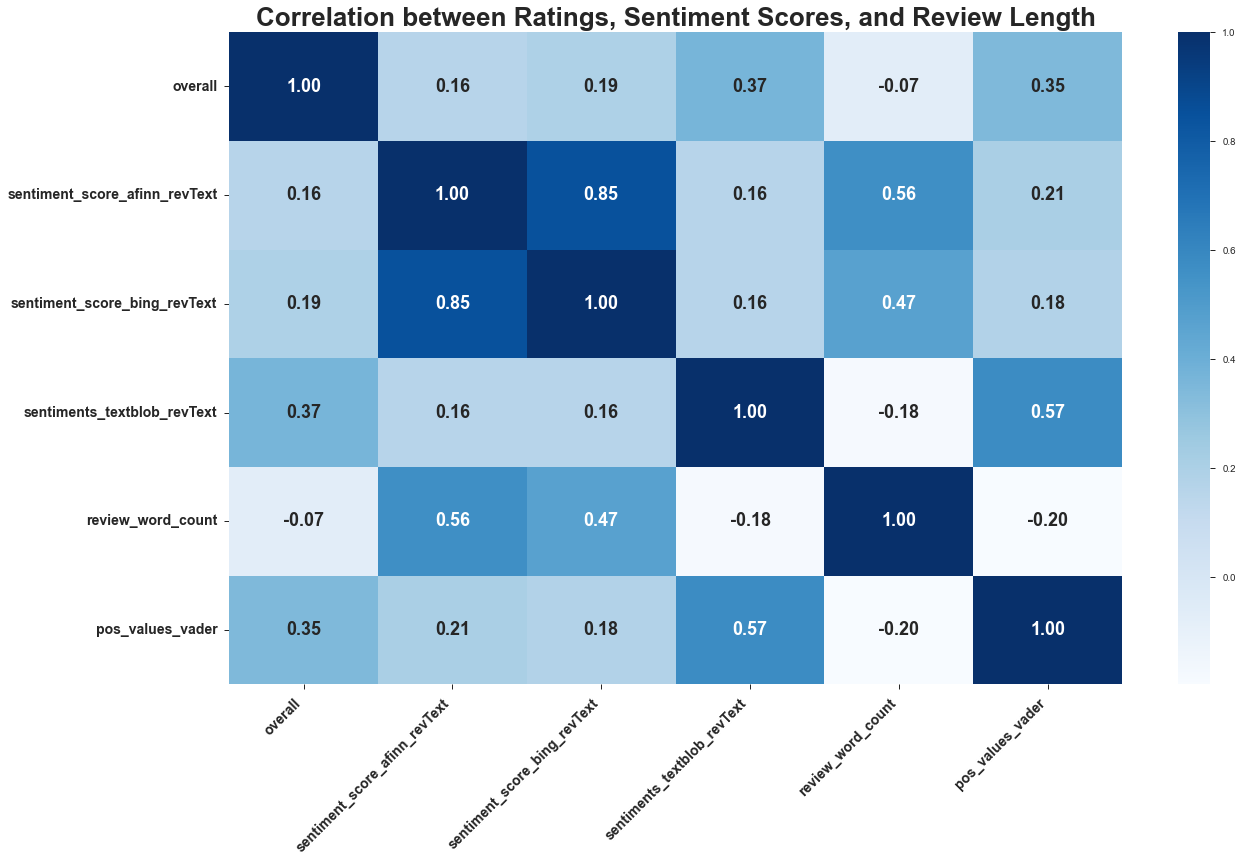

In [111]:
# get correlation between Ratings, Sentiment Scores and Review Length
corr = data_sentiments[['overall', 'sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiments_textblob_revText', 'review_word_count', 'pos_values_vader']].corr()

# heat map for correlation between Ratings, Sentiment Scores and Review Length
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 18, "fontweight": "bold"})
plt.title("Correlation between Ratings, Sentiment Scores, and Review Length", fontsize=26, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.show()



# <a id='toc12_'></a>[Data Summaries](#toc0_)

- overview of dataset
    - number of rows (reviews)
    - number of unique products
    - number of unique reviewers
    - number of unique categories
    - date range of reviews
    - number of reviews per year
    - number of reviews per month
    - number of columns
    - key columns to be used
    - average number of reviews per reviewer
    - average number of reviews per product

- distribution of ratings
- summary of ratings data

- Sentiment used: Bing, NRC, VADER, TextBlob, AFINN

In [113]:
print("Number of rows in the dataset:", data.shape[0])
print("\nNumber of columns in the dataset:", data.shape[1])
print("\nNumber unique products:", data.asin.nunique())
print("\nNumber categories:", data.category.nunique())
print("\nNumber of Reviewers:", data.reviewerID.nunique())
print("\nFirst Review Date:", data.reviewTime.min(), "\nLast Review Date:", data.reviewTime.max())
print("\nAverage number of reviews per product:", round(data.groupby('asin')['reviewerID'].count().mean(), 2))
print("\nAverage number of reviews per reviewer:", round(data.groupby('reviewerID')['asin'].count().mean(), 2))


Number of rows in the dataset: 403379

Number of columns in the dataset: 20

Number unique products: 227087

Number categories: 28

Number of Reviewers: 161159

First Review Date: 1998-05-25 00:00:00 
Last Review Date: 2018-10-04 00:00:00

Average number of reviews per product: 1.78

Average number of reviews per reviewer: 2.5


In [114]:
# key data
data[['reviewerID', 'reviewTime', 'asin','reviewText', 'category', 'overall', 'subjectivities_textblob_revText']].head(15)

,reviewerID,reviewTime,asin,reviewText,category,overall,subjectivities_textblob_revText
0,A29NAG6NZOBAJ8,2014-11-24,B001IH8ERA,tuna yum,grocery_and_gourmet_food,5.0,0.000000
1,A1WVA7V02PQOY6,2015-02-10,B000ZGY4PG,as someone that has always liked eating oatmea...,grocery_and_gourmet_food,5.0,0.705641
2,A1KQJLBDF2OEMD,2015-07-28,B00YLLHNHW,humans are stupid they love and they make mist...,kindle_store,4.0,0.688095
3,A1MUHTKSOY7WVO,2015-05-20,B00GJU4DD0,this thing rocks very lightslim great fit does...,electronics,5.0,0.483333
4,APZSWNPMVSZ84,2002-08-30,B000001FUB,man this ish is on fire the mothership crashed...,cds_and_vinyl,5.0,1.000000
5,A29QYEEE110OWO,2015-11-09,B004TB75L8,this charger works great and is a great altern...,electronics,5.0,0.665000
6,ALCYIT2ODIVM2,2016-03-30,B00996X6PM,very nice for the price,arts_crafts,4.0,1.000000
7,A2QZO7SGY5JGSV,2015-07-19,B00ZZ7S9YW,independant reviewer for paranormal romance an...,kindle_store,5.0,0.473686
8,AMGGZCWY3VNZC,2013-02-13,B00AADADA4,ill be honest the only reason i bought this wa...,movies_and_tv,3.0,0.476963
9,A2VP7BXPBQGP8K,2016-12-24,B0165IE4JI,i have a large head so especially when an add ...,clothing_shoes_and_jewelry,5.0,0.564767


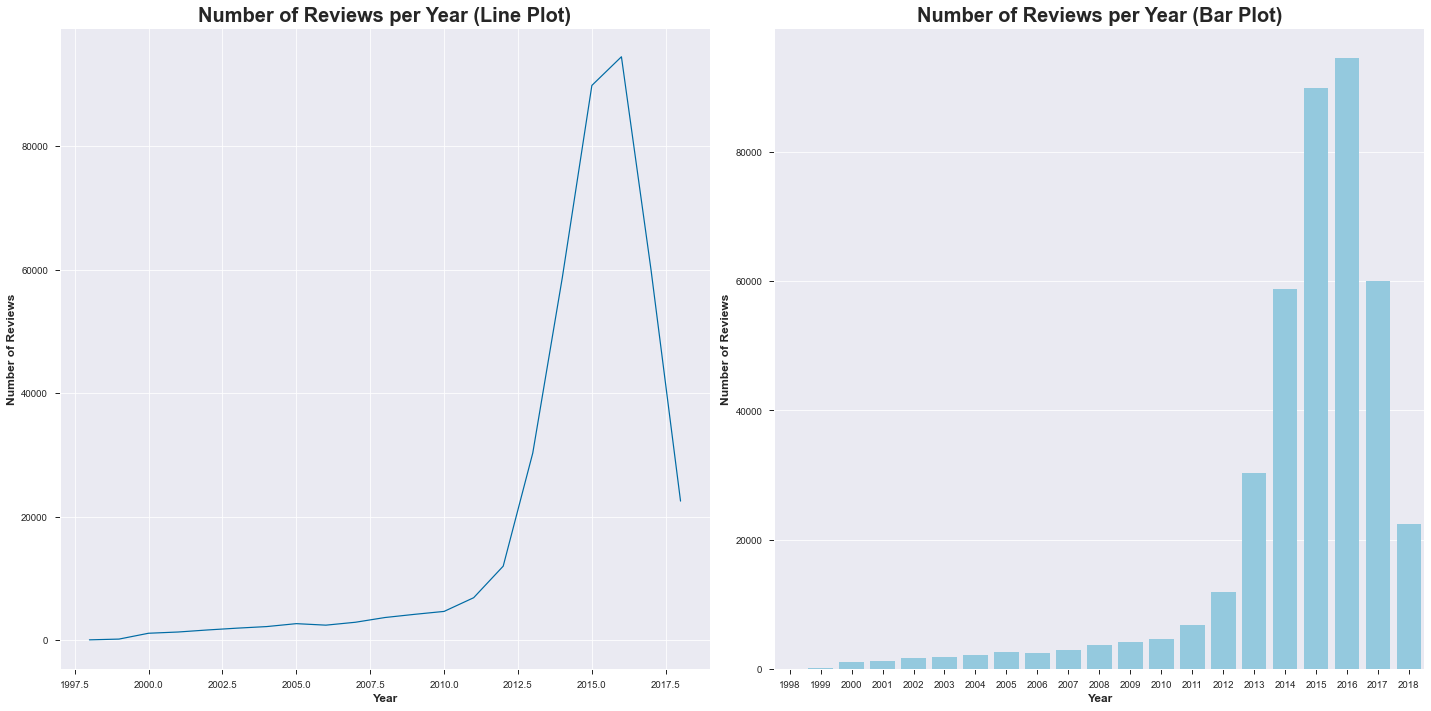

In [115]:
# Reviews Per Year
year_data = data.copy()
year_data['reviewTime'] = data['reviewTime'].dt.year
year_count = year_data.groupby(['reviewTime']).size().reset_index(name='count_rev')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Line plot
axes[0].plot(year_count.reviewTime, year_count.count_rev)
axes[0].set_xlabel('Year', fontsize=12, fontweight='semibold')
axes[0].set_ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
axes[0].set_title("Number of Reviews per Year (Line Plot)", fontsize=20, fontweight='bold')

# Bar plot
sns.barplot(x='reviewTime', y='count_rev', data=year_count, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Year', fontsize=12, fontweight='semibold')
axes[1].set_ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
axes[1].set_title("Number of Reviews per Year (Bar Plot)", fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()


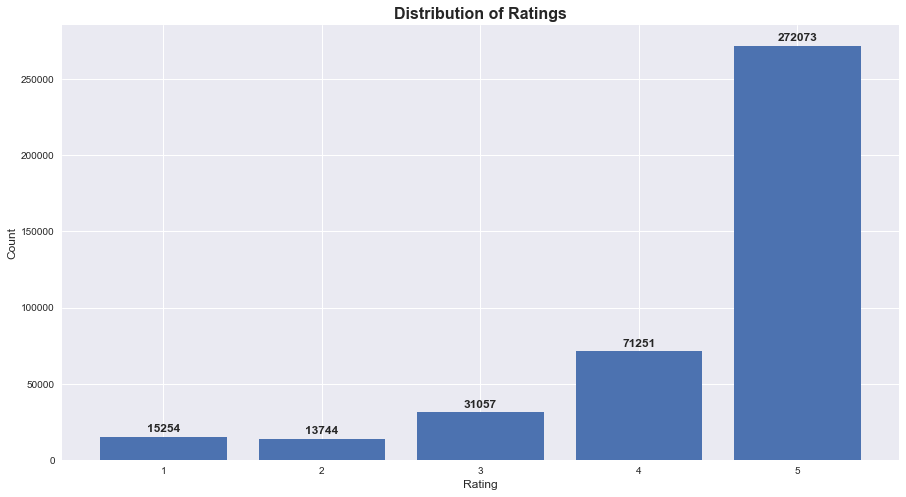

In [116]:
# Distribution of Ratings
plt.style.use('seaborn')
ratings = data['overall'].astype('category')
rating_counts = ratings.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(rating_counts.index, rating_counts.values, color='#4c72b0')
for rect in bars:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                weight='semibold',
                fontsize=12)
ax.set_title("Distribution of Ratings", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [117]:
# Number Summary of Ratings
print("Number Summary of Ratings")
display(data['overall'].describe())

Number Summary of Ratings


count    403379.000000
mean          4.415902
std           1.027197
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

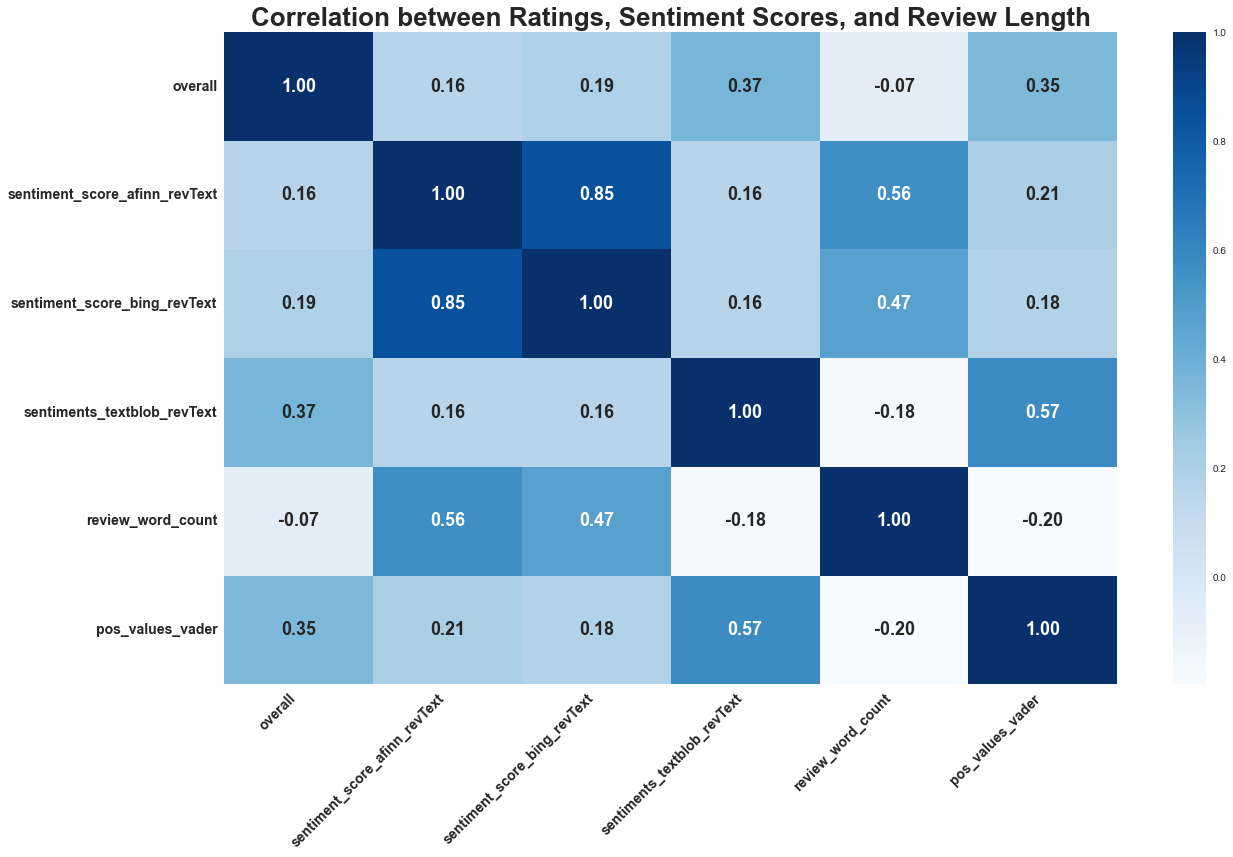

In [118]:
# Correlation Plot for Sentiments
corr = data_sentiments[['overall', 'sentiment_score_afinn_revText', 'sentiment_score_bing_revText', 'sentiments_textblob_revText', 'review_word_count', 'pos_values_vader']].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 18, "fontweight": "bold"})
plt.title("Correlation between Ratings, Sentiment Scores, and Review Length", fontsize=26, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold', fontsize=14)
plt.yticks(fontweight='bold', fontsize=14)
plt.show()
